-----

<div style="text-align: center; margin: 20px 0;">
    <p style="color: #000; font-size: 36px; text-align: center; font-weight: bold; margin: 0;">Video Games 
    </p>
    <p style="color: #000; font-size: 20px; text-align: center;  margin: 10px 0;">
        How can we make them a success?
    </p>
</div>

---

**Fictitious job as data scientist in ICE an online video game store**.   
**The year is 2016 and we are planning the route for 2017**.

## 1. Introduction


The **main goal** is to itentify patterns that determine whether a game is successful or not. In order to be able to spot promising projects and plan advertising campaigns.

Hypothesis will be tested, one of them is to know if the average user score is the same for two of the main platforms (Xbox one, and PC). The other one is to verify is the average user score for the genre accion and sport are differ from each other. 


## 2. Libraries and dataset

In [243]:
# Import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import plotly.express as px
import seaborn as sns
import scipy.stats as st
from scipy.stats import ttest_ind

## 3. Diccionary

**`games.csv:`**
- `'Name'` : Name of the videogame.
-  `'Platform'`: Console where the game is play.
-  `'Year_of_Release'`: Year of release.
-  `'Genre'`: Genres like sports and accion.
-  `'NA_sales'`: North American sales in millions of US dollars
-  `'EU_sales'`: European sales in millions of US dollars
-  `'JP_sales'`: Japan  sales in millions of US dollars
-  `'Other_sales'`: Other countries sales in millions of US dollars
-  `'Critic_Score'`: 0 to 100 rating scale.
-  `'User_Score'`: 0 to 10 rating scale.
-  `'Rating'`: The Entertainment Software Rating Board (ESRB) is an organization that assigns age and content ratings to consumer video games.

In [244]:
# Read dataset and create its variable 'games'
games = pd.read_csv('games.csv') 

## 4. Exploring the data

### 4.1 Review of the dataframe

In [245]:
print('Info. about the DataFrame Games:')
games.info()
print('\nFirst 20 rows of Games:')
games.head(20)

Info. about the DataFrame Games:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB

First 20 rows of Games:


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


**To be developed**:

1. The shape has 16715 rows and 11 columns.

2. The name of the columns should be in lowercase. 

3. Some dtypes are incorrect like `['User_score']`can be `float64`, also `['Year_of_Release']` must be an  `int64`.
 


4. Columns missing values with total entries:

  - `['Name']` 16713: almost none NaN. 
  - `['Year_of_Release']`16446: some NaN.
  - `['Genre']` 16713: almost none NaN. 
  - `['Critic_score']`8137: alarming number of NaN.
  - `['User_score']` 10014: significant number of NaN.
  - `['Rating']` 9949: alarming number of NaN.
  

5. The data will be analyzed more in order to figure it out what to do with the columns with alarming missing values.  

## 5. Data Wrangling

In [246]:
# Change the format name of the columns to lowercase 
games.columns = games.columns.str.lower()
print('Name of the columns in lowercase:')
games.columns.tolist()

Name of the columns in lowercase:


['name',
 'platform',
 'year_of_release',
 'genre',
 'na_sales',
 'eu_sales',
 'jp_sales',
 'other_sales',
 'critic_score',
 'user_score',
 'rating']

In [247]:
# Check for duplicate rows
duplicate_rows = games[games.duplicated()]
# Results
if duplicate_rows.empty:
    print("Duplicate rows: 0 ")
else:
    print(duplicate_rows) 

Duplicate rows: 0 


### 5.1  Missing values and datatypes

The NaN will be treated, and the data types will be converted to appropriate dtypes when needed.

####  5.1.1 Name

In [248]:
# Name missing values total 
games[games['name'].isnull()]

# Delete the two NaN
games.dropna(subset=['name'], inplace=True)

# Results
if games['name'].isnull().sum() == 0:
    print("Name missing values: 0")
else:
    print(games[games['name'].isnull()])

Name missing values: 0


####  5.1.2  Year_of_release

In [249]:
# Year_of_release missing values total
games[games['year_of_release'].isnull()]

# Delete the 269 NaN (is a small number compare to the dataset)
games.dropna(subset=['year_of_release'], inplace=True)

# Results
if games['year_of_release'].isnull().sum() == 0:
    print("Year_of_release missing values: 0")
else:
    print(games[games['year_of_release'].isnull()])

Year_of_release missing values: 0


In [250]:
# Convert the dtype from float to int
games['year_of_release'] = games['year_of_release'].astype(int)
dtype = games['year_of_release'].dtype
print('Correct dtype:', dtype)

Correct dtype: int64


####   5.1.3  Genre

In [251]:
# Genre missing values total
games[games['genre'].isnull()]

# Already drop them with the missing values of names or year_of_release.

# Results
if games['genre'].isnull().sum() == 0:
    print("Genre missing values: 0")
else:
    print(games[games['genre'].isnull()])

Genre missing values: 0


####   5.1.4 Critic_score

In [252]:
# Critic_score missing values total: 8461
games[games['critic_score'].isnull()]

# Around half of the data is missing

# print the unique values to check if there's an odd entry
print("Unique values of 'critic_score':")
games['critic_score'].unique()

Unique values of 'critic_score':


array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

The dtype can be converted to int, and NaN must be treated since there are a lot of them. 

In [253]:
# Convert the dtype from float to int
games['critic_score'] = pd.to_numeric(games['critic_score'], errors='coerce')
dtype = games['critic_score'].dtype
print('Correct dtype:', dtype)

Correct dtype: float64


In [254]:
# Filling missing values 
games['critic_score'] = games['critic_score'].fillna(
    np.ceil(games.groupby('genre')['critic_score'].transform('mean'))
    )
 # Correct dtype 
games['critic_score'] = games['critic_score'].astype(int)

# Results
if games['critic_score'].isnull().sum() == 0:
    print("Critic_score missing values: 0")
else:
    print(games[games['critic_score'].isnull()])

Critic_score missing values: 0


Missing values were filled in with the `['critic_score']`  median grouped by `['genre']`.

####   5.1.5  User_score

In [255]:
# User_score missing values total: 6605
games[games['user_score'].isnull()]

# Almost half of the data is missing

# print the unique values to check if there's an odd entry
print("Unique values of 'user_score':")
games['user_score'].unique() 

Unique values of 'user_score':


array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

The dype must be float, and 'tbd' must me change to nan. Also, the NaN must be treated since there are a lot of them. 

In [256]:
# Replace tbt with NaN
games['user_score'] = games['user_score'].replace('tbd', np.nan)

# Results
games['user_score'].unique() 

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [257]:
# Covert dtype from object to float
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')
dtype = games['user_score'].dtype
print('Correct dtype:', dtype)

Correct dtype: float64


In [258]:
# Filling missing values 
games['user_score'] = games['user_score'].fillna(
    games.groupby('genre')['user_score'].transform('mean')
    )

games['user_score'] = games['user_score'].apply(lambda x: round(x, 1)) # with one decimal only

# Results
if games['user_score'].isnull().sum() == 0:
    print("User_score missing values: 0")
else:
    print(games[games['user_score'].isnull()])    

User_score missing values: 0


Missing values were filled in with the `['user_score']`  median grouped by `['genre']`.

####   5.1.6 Rating

In [259]:
# Rating missing values total: 6676
games[games['rating'].isnull()]

# Almost half of the data is missing

# print the unique values to check if there's an odd entry
games['rating'].unique() 

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

The NaN must treated, since there are a lot of them missing.

In [260]:
# Display rating categories and value counts

games['rating'] = games['rating'].fillna('RP')

print('ESRB rating categories:')
games['rating'].value_counts()

ESRB rating categories:


rating
RP      6677
E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
Name: count, dtype: int64

**ESRB Rating explanation:**
- E: Everyone (K-A), suitable for all ages.

- T: Teens, , suitable for 13+ ages.

- M: Mature, suitable for 17+ ages.  

- E10+: Everyone, suitable for 10+ ages.

- EC:  Early childhood, preschool ages.

- RP: Rating Pending .

- AO:  Adults Only, suitable for  ages 18+.


In [261]:
# Adjust categories 
games['rating'] = games['rating'].replace('EC', 'E')
games['rating'] = games['rating'].replace('K-A', 'E')
games['rating'] = games['rating'].replace('AO', 'M')
print('ESRB rating categories:')
games['rating'].value_counts()

ESRB rating categories:


rating
RP      6677
E       3932
T       2905
M       1537
E10+    1393
Name: count, dtype: int64

In [262]:
# Missing values results
if games['rating'].isnull().sum() == 0:
    print("Rating missing values: 0")
else:
    print(games[games['rating'].isnull()])    

Rating missing values: 0


### 5.2 Total sales per video game 

In [263]:
# Total_sales new column
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,69,7.3,RP,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,73,7.6,RP,31.38


## 6.  Data analysis

###  6.1 Video games released each year (1980-2016)

#### 6.1.1 How many games were released each year?

Let's take a look at video game and sales distribution. 

First, let see how many video games were released in each year.

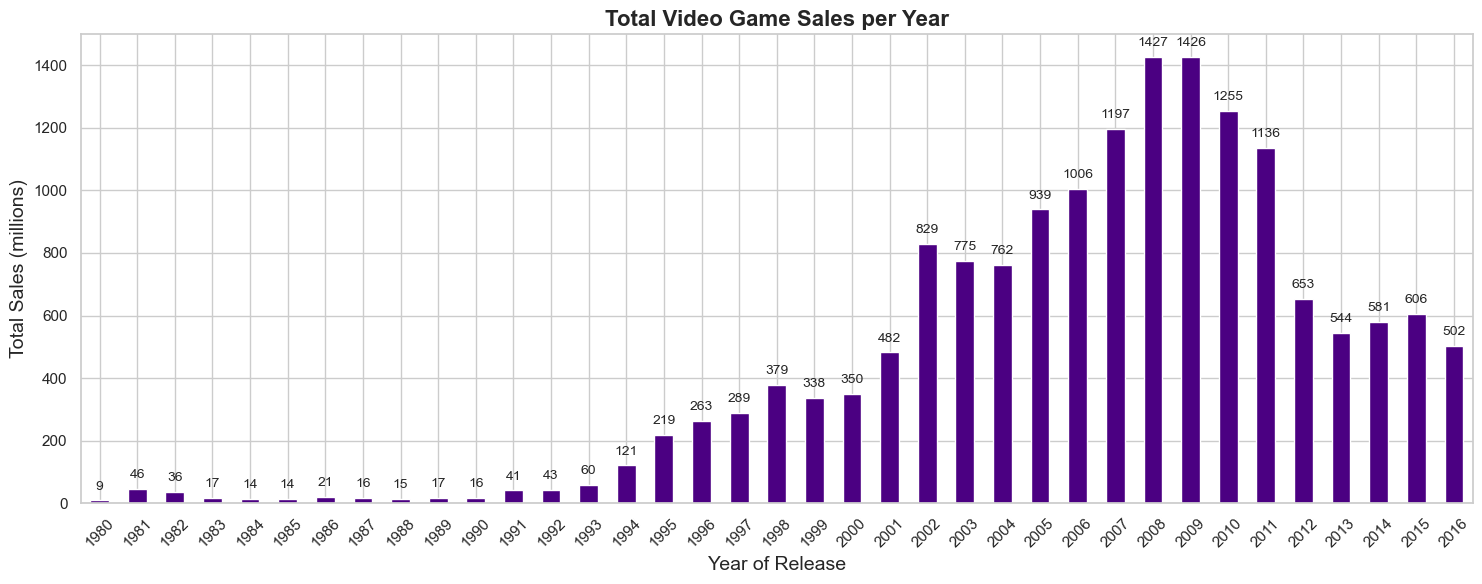

In [264]:
# Total number of video games released by year 
game_counts_per_year = games.groupby('year_of_release').size()
 
# Seaborn grid
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(15, 6))
barplot = game_counts_per_year.plot(
    kind="bar", 
    color="indigo", 
    edgecolor="white"
)

# Titles and labels
plt.title('Total Video Game Sales per Year', fontsize=16, fontweight='bold')
plt.xlabel('Year of Release', fontsize=14)
plt.ylabel('Total Sales (millions)', fontsize=14)
plt.xticks(rotation=45)


# Add value labels on the bars
for p in barplot.patches:
    barplot.annotate(
        format(p.get_height(), '.0f'), 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', va='center', 
        xytext=(0, 10), 
        textcoords='offset points',
        fontsize=10
    )

# Show the plot
plt.tight_layout()
plt.show()

**Are the sales changes in each year's data significant?**

The first two decades had very low sales, we can see that from 2002 sales increased twice as much as the previous year, then from 2002 to 2011 there was the highest number of sales on record, since then sales have decreased.

Let's explore more:

1. **Early Years (1980-1995)**:
   - Sales were low during this period, it wasn't a solid market.
   - Since 1990, sales have increased slightly, but not enough to be considered a peak.

   
2. **Growth Period (1995-2002)**:
      - In 1995 the total sales were almost twice as much the previous year. 
      - Sales grew continuously each year, reaching a substantial level by 2002.


3. **Peak Years (2002-2010)**:
   - The sales significantly increase, were peaking in 2008 and 2009 with sales exceeding 1,400 million each year.
   - The peak in 2008-2009 may be associated with the high global demand for gaming during this period,when they become a mainstream form of entertainment.
   

4. **Decline Period (2010-2016)**:
   - From 2012 there is a noticeable decline in sales, with the most notable drop occurring between 2011 and 2012. This could be directly related to the introducion of smartphones. 
   - Although sales increased slightly around 2014-2015, they did not return to the levels seen during the peak years.

**Conclusion:** 
What we need to cover is how to adapt to the changing user preferences of the gaming industry and the introduction of the smartphones.

### 6.2 Sales per platform

#### 6.2.1  Let's look at how the total sales for video games varied by platform platform

Platforms with most sales:
   platform  total_sales
16      PS2      1233.56
28     X360       961.24
17      PS3       931.34
26      Wii       891.18
4        DS       802.78


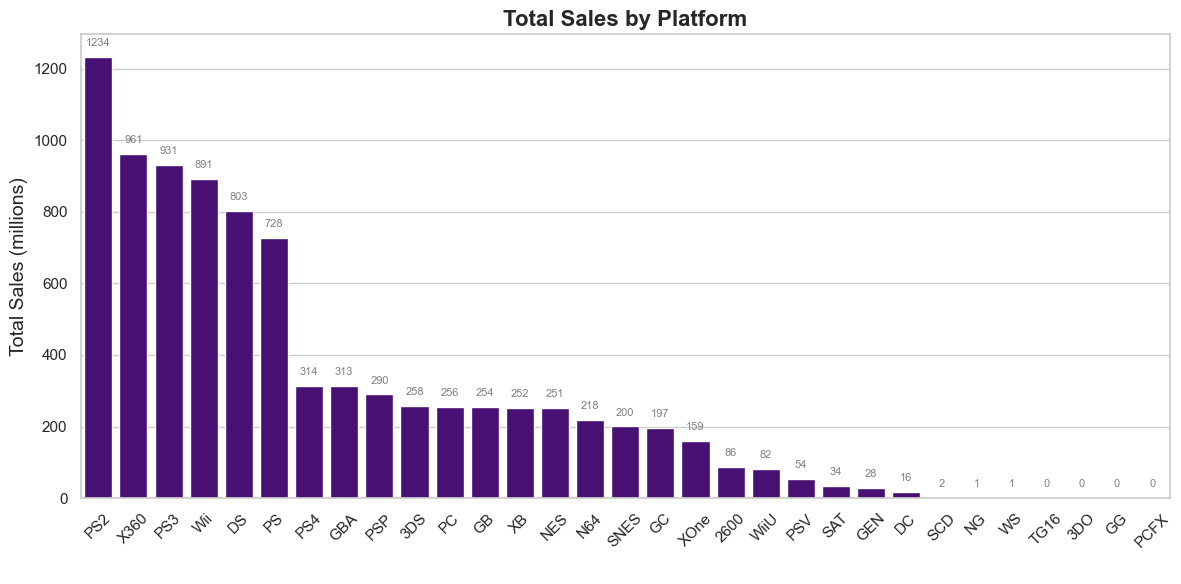

In [265]:
# Group by 'platform' and sum 'total_sales'
platform_sales = games.groupby('platform')['total_sales'].sum().reset_index()

# Sort the results in descending order
platform_sales = platform_sales.sort_values(by='total_sales', ascending=False)

# Results
print('Platforms with most sales:')
print(platform_sales.head()) # top 5 sales

# Create a bar plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='platform', y='total_sales', data=platform_sales, color="indigo", edgecolor="white")

# Titles and labels
plt.title('Total Sales by Platform', fontsize=16, fontweight='bold')
plt.xlabel('Platform', color='white', fontsize=14)
plt.ylabel('Total Sales (millions)', fontsize=14)
plt.xticks(rotation=45)

# Add value labels on the bars
for p in plt.gca().patches:
    plt.annotate(
        format(p.get_height(), '.0f'), 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', va='center', 
        xytext=(0, 10), 
        textcoords='offset points',
        fontsize=8,
        color='gray'
    )

# Show the plot
plt.tight_layout()
plt.show()

The top 5 of `'platforms'` with most sales in millions are: 
- 'PS2' total: 1233.56.
- 'X360' total: 961.24.
- 'PS3' total: 931.34.
- 'Wii' total: 891.18.
- 'DS' total: 802.78.

At the bottom of the list its shown that SCD, NG, WS, TG16, 3DO, GG, and PCFX have less than 2 milllons sales in total, due the period of the analysis it can be interfered that some of them were from the 80's. It'll be discussed later.


#### 6.2.2.  Top five platforms in video game sales

Top 5 platforms in total sales and its distribution by year.

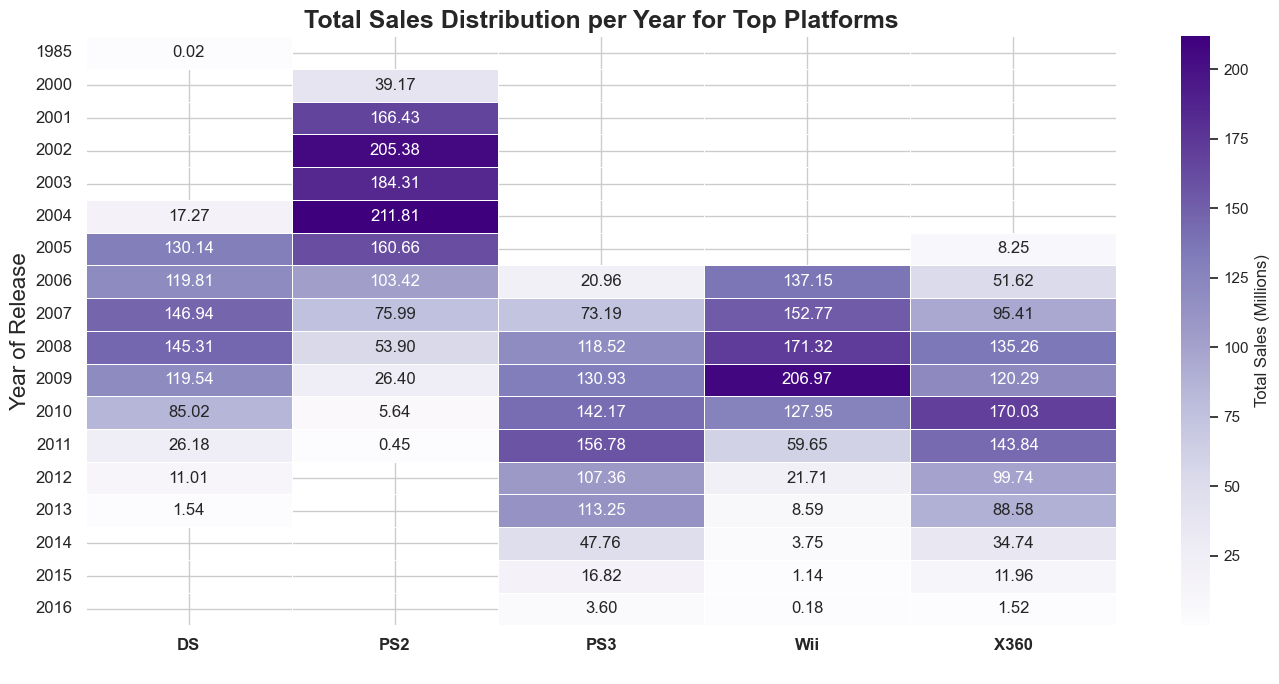

In [266]:
# List of platforms with the highest total sales
top_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS']

# Filter the Games DataFrame for these platforms and exclude rows where 'total_sales' is 0
filtered_games = games[(games['platform'].isin(top_platforms)) & (games['total_sales'] != 0)]

# Group by 'year_of_release' and 'platform', summing the 'total_sales'
yearly_distribution_5 = filtered_games.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack(fill_value=0)

# Create a heatmap using Seaborn
plt.figure(figsize=(14, 7))
sns.heatmap(yearly_distribution_5.replace(0, np.nan), cmap='Purples', annot=True, fmt='.2f', linewidths=0.5, cbar_kws={'label': 'Total Sales (Millions)'})


# Titles and labels
plt.title('Total Sales Distribution per Year for Top Platforms', fontsize=18, fontweight='bold')
plt.xlabel('Platform', color='white')
plt.ylabel('Year of Release', fontsize=16)

plt.xticks(fontsize=12, fontweight='bold') 
plt.yticks(fontsize=12)  

# Show the plot
plt.tight_layout()  
plt.show()


**The graph illustrates the total sales distribution (in millions) for the top gaming platforms—DS, PS2, PS3, Wii, and X360—over the years**.

**PS2 (2000-2011)**:
   - Launched in 2000, the PS2 reached its peak sales between 2002 and 2004, with the highest sales recorded in 2004.
   - Sales began to decline after 2005 but remained significant until the last recorded sales in 2011.

**DS (2004-2013)**:
   - The DS experienced a rapid sales increase starting around 2005, with a peak from 2007 to 2009.
   - Sales began to decline in 2008 as newer gaming platforms entered the market.
   
**PS3 (2006-2016)**:
   - PS3 sales started growing in 2006, reaching their peak around 2008-2009.
   - A gradual decline followed, reflecting the console’s aging and competition from newer systems.

 **Wii (2006-2016)**:
   - The Wii gained popularity immediately upon its 2006 release, peaking between 2006 and 2009.
   - Its appeal was driven by motion-control gaming and a broad audience reach.
   - Sales sharply declined from 2012 onwards as new consoles were introduced.

**X360 (2005-2016)**:
   - Sales growth began in 2005, showing a continuous upward trend until peaking around 2010.
   - From 2012 onwards, sales declined due to the arrival of newer console generations.

**Summary**:
- Each console experienced a peak sales period of about 3-5 years before a decline, often coinciding with the launch of newer models or competing consoles.
- The PS2 had the longest sustained peak, showcasing its market dominance during its prime years.
- The Wii and DS saw strong but shorter peak periods, corresponding to their initial surge in popularity.

The graph underscores the cyclical nature of the console gaming industry, characterized by new releases, peak sales phases, and eventual declines as platforms age and newer options become available.

#### 6.2.3 Platforms cycles

How long does it usually take for new platforms to appear and old ones to disappear?


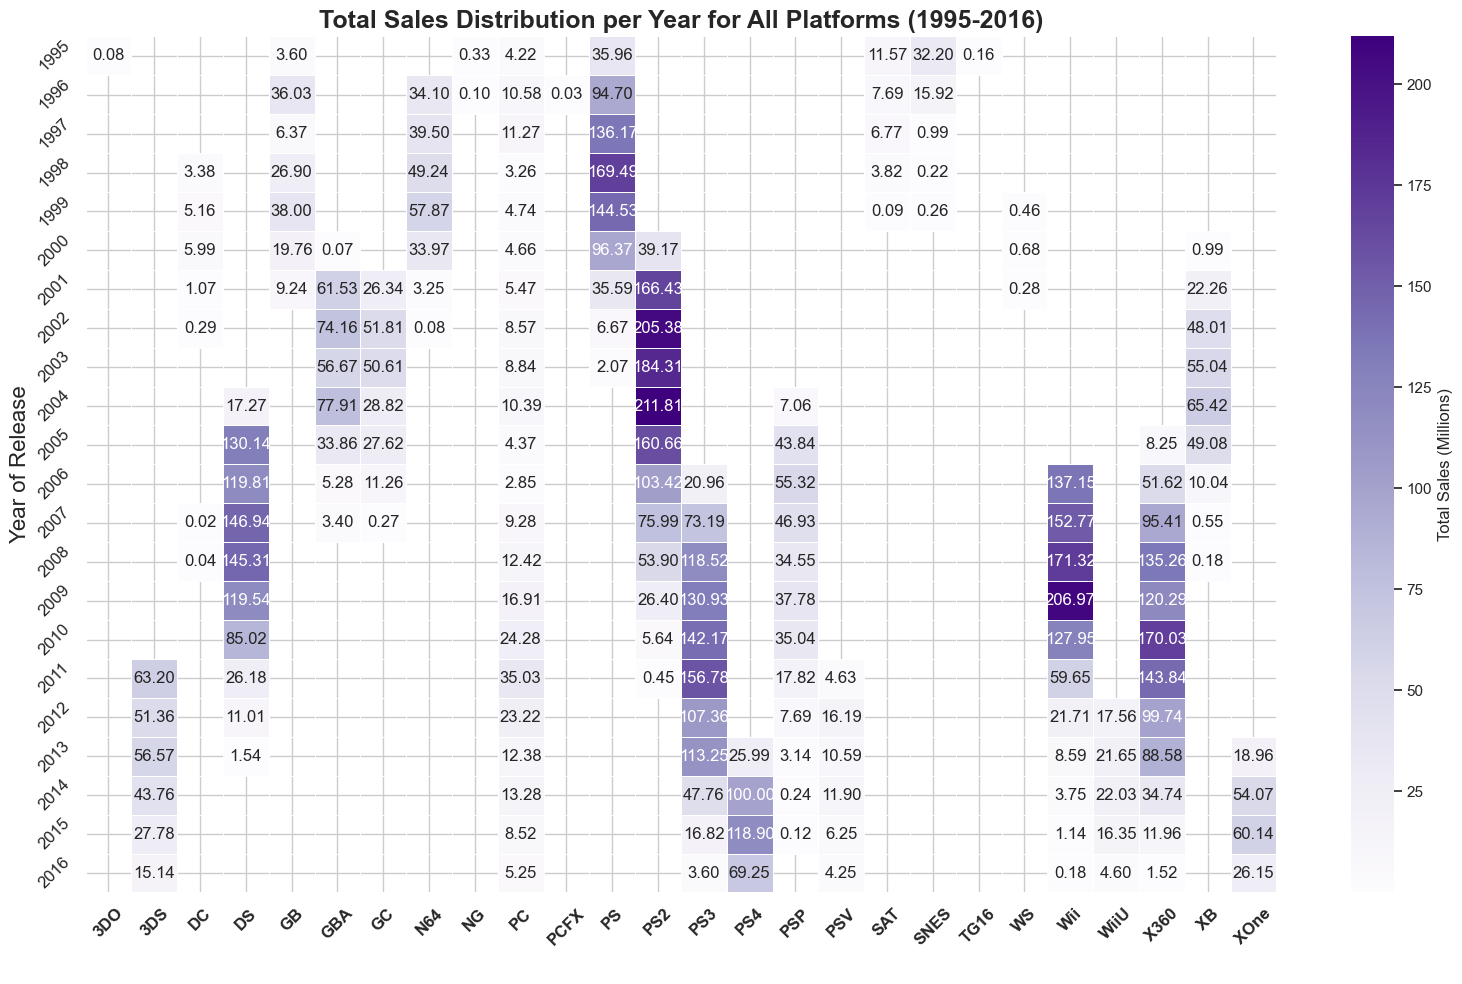

In [267]:
# Filter the data to include only the years from the Growth Period (1995-2002) until the Decline Period (2010-2016),
# and exclude rows where 'total_sales' is 0
filtered_games = games[(games['year_of_release'] >= 1995) & 
                       (games['year_of_release'] <= 2016) & 
                       (games['total_sales'] != 0)]

# Group by 'year_of_release' and 'platform', summing 'total_sales'
yearly_distribution_all = filtered_games.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()

# Create a heatmap using Seaborn
plt.figure(figsize=(16, 10))
sns.heatmap(yearly_distribution_all, cmap='Purples', annot=True, fmt='.2f', linewidths=0.5, cbar_kws={'label': 'Total Sales (Millions)'})

# Titles and labels
plt.title('Total Sales Distribution per Year for All Platforms (1995-2016)', fontsize=18, fontweight='bold')
plt.xlabel('Platform', fontsize=16, color='white')
plt.ylabel('Year of Release', fontsize=16)

plt.xticks(rotation=45, fontsize=12, fontweight='bold')  
plt.yticks(rotation=45, fontsize=12) 
# Show the plot
plt.tight_layout() 
plt.show()

**Selected Platforms for Further Studies**
- 3DS
- DS
- GBA
- GC
- N64
- PS
- PC
- PS2
- PS3
- PS4
- PSP
- PSV
- Wii
- WiiU
- X360
- XB
- XOne

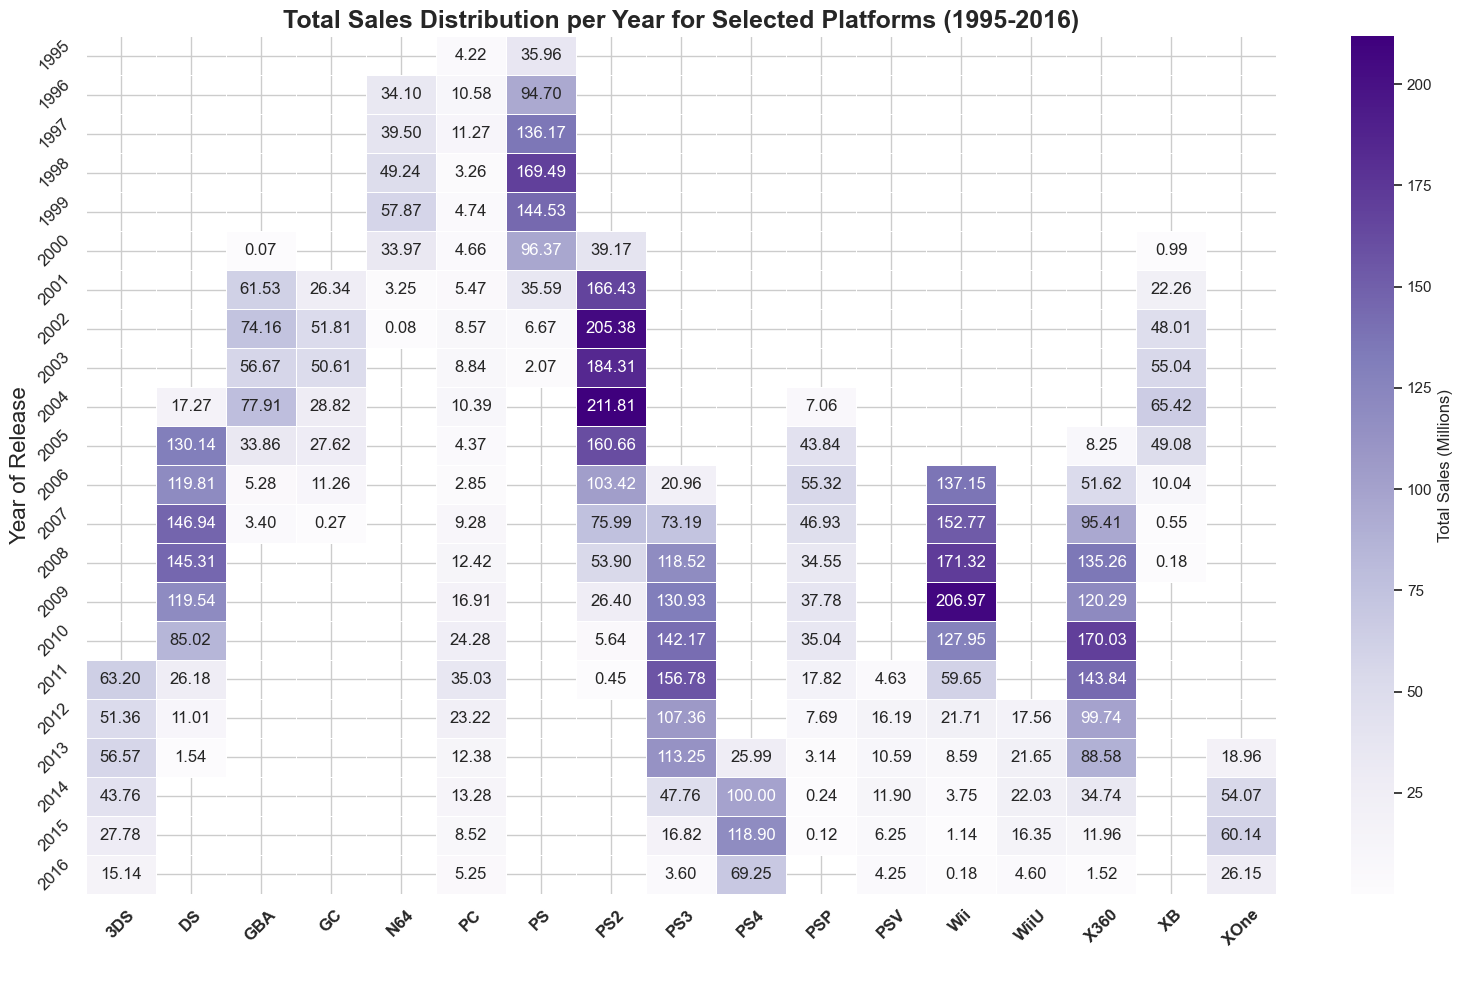

In [268]:
# Selected platforms
selected_platforms = ['3DS', 'DS', 'GBA', 'GC', 'N64', 'PS', 'PC', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV', 'Wii', 'WiiU', 'X360', 'XB', 'XOne']

# Filter the data to include only the years from the Growth Period (1995-2002) until the Decline Period (2010-2016)
filtered_games = games[(games['year_of_release'] >= 1995) & (games['year_of_release'] <= 2016)]

# Further filter the data to include only the selected platforms and exclude rows where 'total_sales' is 0
filtered_games = filtered_games[(filtered_games['platform'].isin(selected_platforms)) & (filtered_games['total_sales'] != 0)]

# Group by 'year_of_release' and 'platform', summing 'total_sales'
yearly_distribution_selected = filtered_games.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()

# Create a heatmap using Seaborn
plt.figure(figsize=(16, 10))
sns.heatmap(yearly_distribution_selected, cmap='Purples', annot=True, fmt='.2f', linewidths=0.5, cbar_kws={'label': 'Total Sales (Millions)'})

# Titles and labels
plt.title('Total Sales Distribution per Year for Selected Platforms (1995-2016)', fontsize=18, fontweight='bold')
plt.xlabel('Platform', fontsize=16, color='white')
plt.ylabel('Year of Release', fontsize=16)

plt.xticks(rotation=45, fontsize=12, fontweight='bold')  
plt.yticks(rotation=45, fontsize=12) 
# Show the plot
plt.tight_layout() 
plt.show()

**How long does it usually take for new platforms to appear and old ones to disappear?**

**Lifespan**:

1. **3DS**: 2011 - 2016 → **6 years**  
2. **DS**: 2004 - 2013 → **10 years**  
3. **GBA (Game Boy Advance)**: 2001 - 2008 → **8 years**  
4. **GC (GameCube)**: 2001 - 2007 → **7 years**  
5. **N64 (Nintendo 64)**: 1996 - 2002 → **7 years**  
6. **PC**: 2001 - 2016 → **16 years** 
7. **PS (PlayStation 1)**: 1995 - 2004 → **10 years**  
8. **PS2**: 2000 - 2013 → **14 years**  
9. **PS3**: 2006 - 2015 → **10 years**  
10. **PS4**: 2013 - 2016 → **4 years** 
11. **PSP**: 2004 - 2014 → **11 years**  
12. **PSV**: 2011 - 2016 → **11 years**  
13. **Wii**: 2006 - 2016 → **11 years**  
14. **WiiU**: 2012 - 2016 → **5 years**  
15. **XB (Xbox)**: 2001 - 2008 → **8 years**  
16. **X360 (Xbox 360)**: 2005 - 2015 → **11 years**  
17. **XOne (Xbox One)**: 2013 - 2016 → **4 years**  



New consoles or platforms usually come out every **5 to 7 years**. 

**Results**:



1. **Generations of Consoles**: Game consoles come out in waves, or **generations**, with new models releasing every **5 to 7 years**. Each new console often overlaps with the last one. For example:
   - **PlayStation** models (PS, PS2, PS3, PS4) and **Xbox** consoles (Xbox, Xbox 360, Xbox One) had a few years when two were selling at the same time.
   - So, even though the **PS2** was popular, people started switching to the **PS3** when it came out, and then to the **PS4**.
   

2. **Life Cycle of Consoles**: Most consoles peak in popularity a few years after release, then fade as newer ones come out. The **PS2**, for example, was around for a long time,14 years, because it kept selling well even after newer consoles launched. **Wii** and **DS** also had long lives because they stayed popular for over 10 years.

3. **Portable vs. Home Consoles**: Portable devices like **GBA**, **DS**, and **PSP** have shorter lives because newer models (like DS replacing GBA) come out more often. 

4. **PC Sales Are Different**: Unlike consoles, **PC gaming** isn’t tied to a specific model. PCs just keep upgrading, so they have steady sales over time rather than rising and falling with each console generation.

5. **Transition Periods**: When a new console comes out, people don’t switch immediately. For example, **PS3** and **Xbox 360** kept selling well even after **PS4** and **Xbox One** were released. People take time to adopt new consoles.

6. **Competing Platforms**: Some consoles, like **PS3** and **Xbox 360**, directly compete and have similar lifespans and popularity periods. They peaked around the same time because they offered similar experiences.

7. **Long-Lasting Favorites**: Some consoles, like **PS2**, **Wii**, and **DS**, became classics. They stayed popular even when newer consoles launched.


Each platform has a lifespan of **6-10 years**, with peaks in popularity followed by a gradual decline. They overlap with new models, have periods where people are switching, and some stay popular longer than others.

In general, **new platforms are release every 5 to 7 years**, and **old platforms decline 5-6 years** after a new platform appears. This pattern creates a bit of overlap where both old and new platforms are active, giving players time to transition.

### 6.3 The future of Videogames (2017)
Analysis of the data for next year campaign.
- Identifying top sellers platforms. 

#### 6.3.1 Top selling platforms

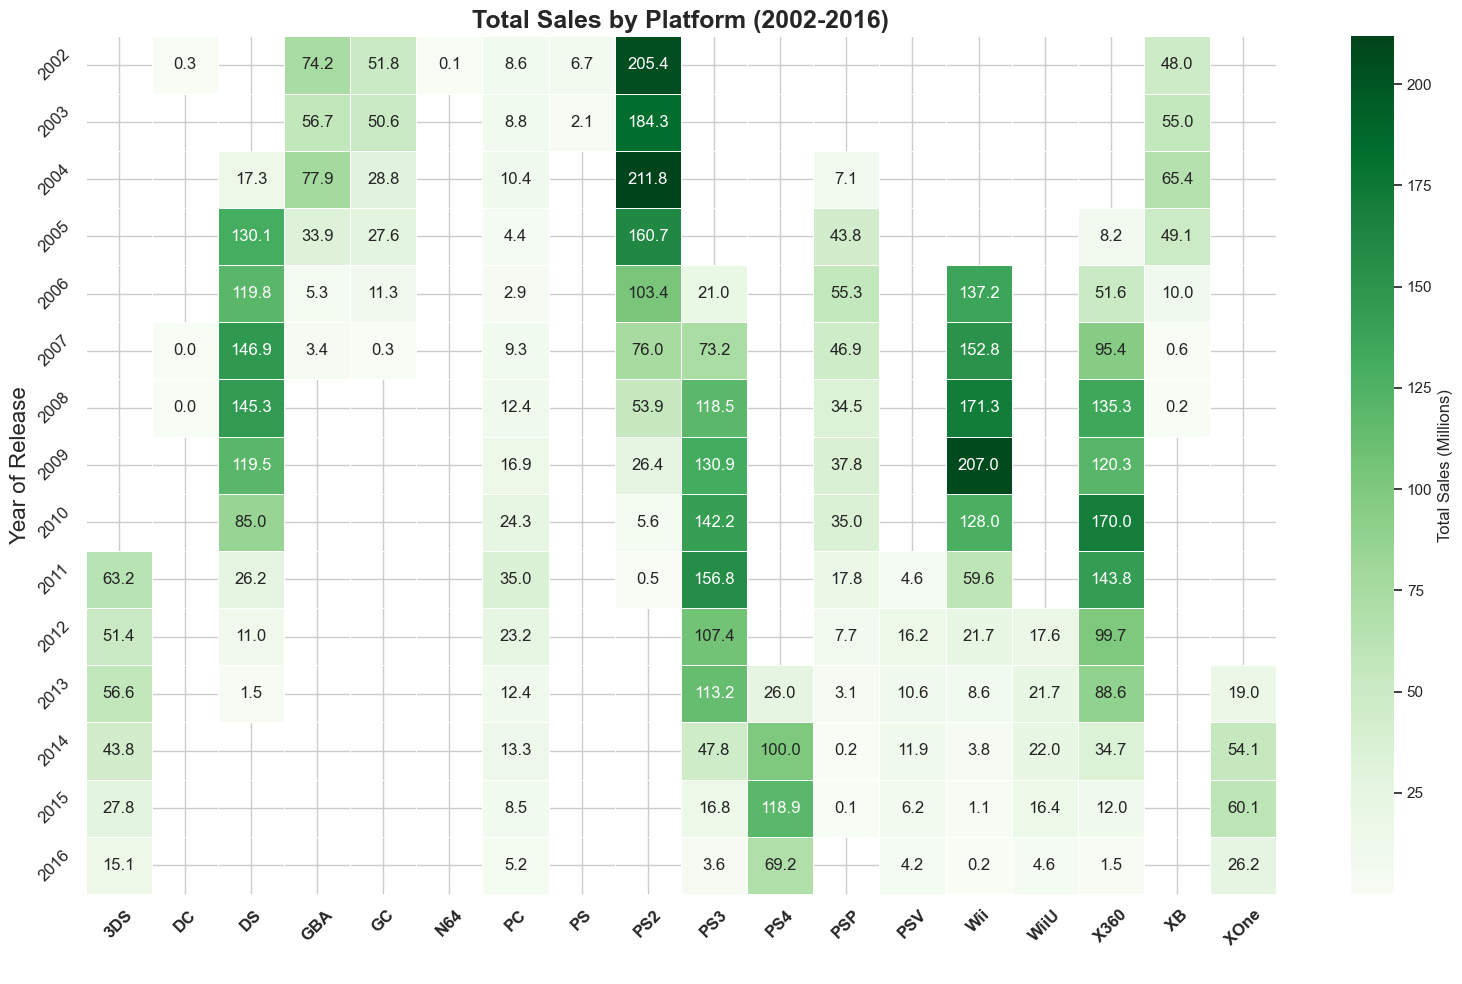

In [269]:
# Filter data for Peak Years (2002-2010) and Decline Period (2010-2016), excluding rows with total_sales == 0
most_used_platforms = games[(games['year_of_release'] >= 2002) & 
                            (games['year_of_release'] <= 2016) & 
                            (games['total_sales'] != 0)]

# Group by 'year_of_release' and 'platform', summing 'total_sales'
yearly_platform_sales = most_used_platforms.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()

# Plot the heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(yearly_platform_sales, cmap='Greens', annot=True, fmt=".1f", linewidths=0.5, cbar_kws={'label': 'Total Sales (Millions)'})

# Titles and labels
plt.title('Total Sales by Platform (2002-2016)', fontsize=18, fontweight='bold')
plt.xlabel('Platform', fontsize=16, color='white')
plt.ylabel('Year of Release', fontsize=16)

plt.xticks(rotation=45, fontsize=12, fontweight='bold')  
plt.yticks(rotation=45, fontsize=12) 
# Show the plot
plt.tight_layout() 
plt.show()

**Results**:

1. **PS2, DS, and Wii**: These platforms had very strong sales at their peak:
   - The **PS2** saw high sales from 2002 to 2006.
   - The **DS** had a significant peak around 2008 and 2009.
   - The **Wii** reached its sales peak in 2009, with the darkest green cell showing it as the highest for that year.
   

2. **PS3 and Xbox 360**: Both platforms saw high sales in the late 2000s and early 2010s.
   - The **PS3** had its highest sales around 2009-2011.
   - The **Xbox 360** peaked around 2009 and maintained decent sales until about 2013.
   - They are the top sellers in the lastest years.
   

3. **PS4 and 3DS**: These platforms did well in the early to mid-2010s.
   - The **PS4** had strong sales starting from 2014, with its peak in 2015.
   - The **3DS** was popular in the early 2010s, especially in 2011 and 2012.


4. **Other platforms**: Consoles like **PC**, **PSV**, and **WiiU** generally show lighter colors, indicating lower sales compared to the more popular platforms. 
     - The **PC** and **PSV** have few but steady sales over the years.
     

**Decline over time**: By 2016, the sales dropped across most platforms, likely due to newer technology and the release of next-generation consoles.


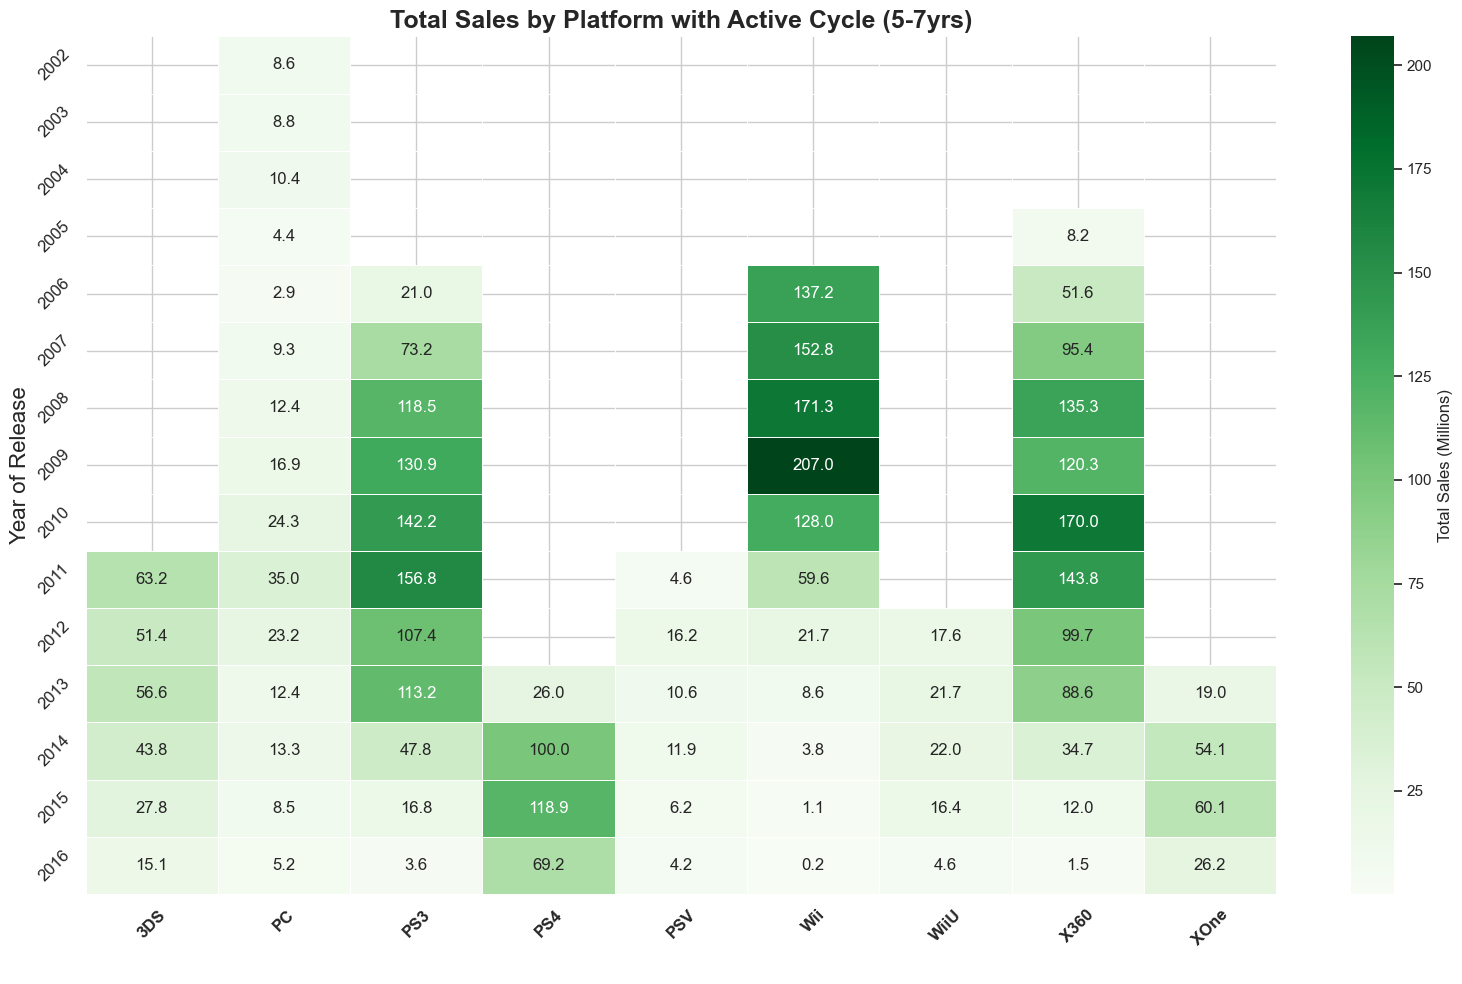

In [270]:
# Filter data for top-selling platforms from 2009 to 2016, ensuring platforms have sales in 2016 and excluding zero sales
platforms_with_sales_2016 = most_used_platforms[most_used_platforms['year_of_release'] == 2016]['platform'].unique()
most_used_platforms = most_used_platforms[(most_used_platforms['platform'].isin(platforms_with_sales_2016)) & 
                                          (most_used_platforms['total_sales'] != 0)]

# Group by 'year_of_release' and 'platform', summing 'total_sales'
yearly_platform_sales = most_used_platforms.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()

# Plot the heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(yearly_platform_sales, cmap='Greens', annot=True, fmt=".1f", linewidths=0.5, cbar_kws={'label': 'Total Sales (Millions)'})

# Titles and labels
plt.title('Total Sales by Platform with Active Cycle (5-7yrs)', fontsize=18, fontweight='bold')
plt.xlabel('Platform', fontsize=16, color='white')
plt.ylabel('Year of Release', fontsize=16)

plt.xticks(rotation=45, fontsize=12, fontweight='bold')  
plt.yticks(rotation=45, fontsize=12) 
# Show the plot
plt.tight_layout() 
plt.show()

**Results**:

- **PS3** and **Wii** had very high sales in earlier years, especially around 2009 and 2010.  Now, **Wii** is at the end of its active cycle.
- The **PS4** platform had a solid start, showing strong sales in 2014 and 2015.
- **Xbox 360** (X360) sales peaked around 2009 and then gradually decreased.
- **Nintendo 3DS (3DS)** had good sales in its early years (around 2011 and 2012) but is at the end of its active cycle.
- **PC** and **PSV** had generally lower sales compared to console platforms like PS3, PS4, and Wii.

By 2016, sales decreased across most platforms, likely because newer consoles were being released, and older platforms became obsolete

**Let's analyze the total sales since 2012, (one half of the life cycle backwards to discard platforms that have finished their cycle) to see which platforms are the sales leaders.**

In [271]:
# Platforms that ended their life cycle to between 2009-2016 

# Filter data for the years of interest (2009-2016)
most_used_platforms = games[(games['year_of_release'] >= 2009) & (games['year_of_release'] <= 2016)]

# Identify platforms with sales in 2016
platforms_with_sales_2016 = most_used_platforms[most_used_platforms['year_of_release'] == 2016]['platform'].unique()

# Identify platforms without sales in 2016
platforms_without_sales_2016 = most_used_platforms[~most_used_platforms['platform'].isin(platforms_with_sales_2016)]['platform'].unique()

# Convert to list
platforms_without_sales_2016 = list(platforms_without_sales_2016)

# Results
print("Platforms that ended their life cycle prior to 2016:", platforms_without_sales_2016)

Platforms that ended their life cycle prior to 2016: ['DS', 'PSP', 'PS2']


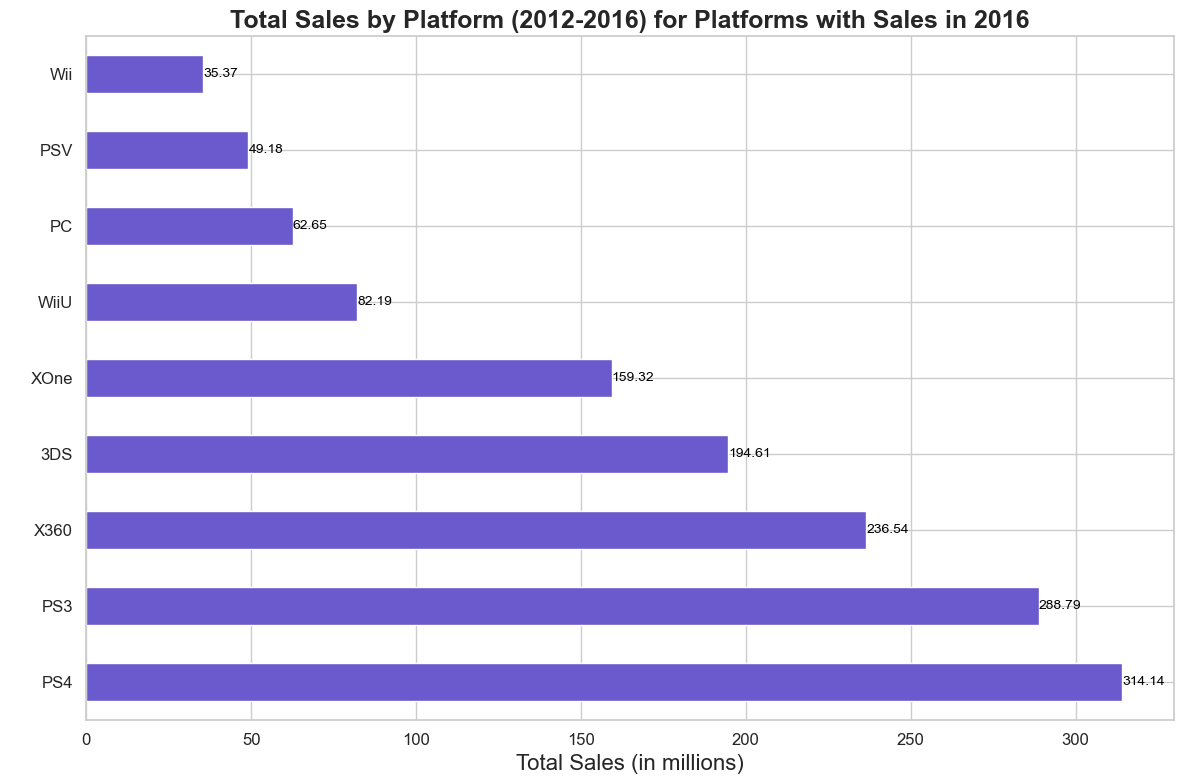

In [272]:
# Filter data 2012 - 2016 
most_used_platforms = games[(games['year_of_release'] >= 2012) & (games['year_of_release'] <= 2016)]

# Further filter to include only platforms with sales in 2016
platforms_with_sales_2016 = most_used_platforms[most_used_platforms['year_of_release'] == 2016]['platform'].unique()
most_used_platforms = most_used_platforms[most_used_platforms['platform'].isin(platforms_with_sales_2016)]

# Group by 'platform' and sum 'total_sales'
platform_sales = most_used_platforms.groupby('platform')['total_sales'].sum()

# Sort platforms by total sales in descending order
platform_sales = platform_sales.sort_values(ascending=False)

# Plot the horizontal bar chart
plt.figure(figsize=(12, 8))
platform_sales.plot(kind='barh',  color="slateblue", edgecolor="white")

# Set the style of the seaborn grid
sns.set(style="whitegrid")

# Adding data labels to each bar
for index, value in enumerate(platform_sales):
    plt.text(value, index, f'{value:.2f}', fontsize=10, color='black', va='center')

# Titles and labels
plt.title('Total Sales by Platform (2012-2016) for Platforms with Sales in 2016', fontsize=18, fontweight='bold')
plt.xlabel('Total Sales (in millions)', fontsize=16)
plt.ylabel('Platform', color='white')


plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()  # Adjust layout

# Show  plot
plt.show()

**Results**:

1. **PS4** has the highest sales among these platforms, reaching over 300 million units sold.
2. **PS3** and **Xbox 360** also had high sales, around 289 million and 237 million, respectively. These platforms were very popular during this period, though slightly lower than PS4.
3. **3DS** performed well too, with nearly 195 million units sold.
4. **Xbox One** had good sales, at about 159 million.
5. **Wii U** and **PC** had moderate sales, with Wii U at 82 million and PC at about 63 million.
6. **Wii** and **PSV** had the lowest sales, with Wii at 35 million and PSV at 49 million.

**Conclusions**: the **PS4** dominated sales in this period, followed by strong performances from **PS3**, **Xbox 360**, and **3DS**. Platforms like Wii and PSV saw much lower sales in comparison. We can see that the top competitors are **PSP3/4** and **X360**.

#### 6.3.2 Bosx plot of total sales by Top-Selling Platforms 

- Are the differences in sales significant? 
- What about average sales across multiple platforms? 

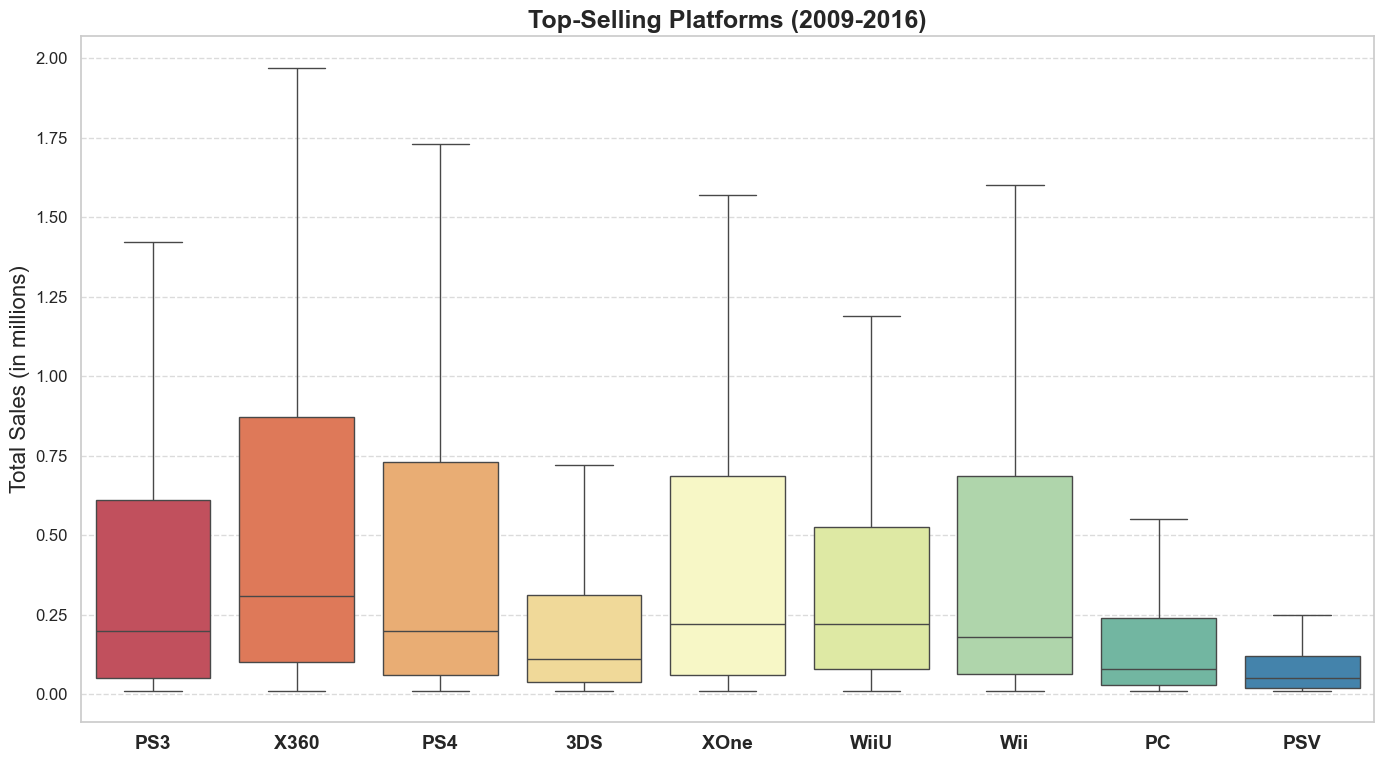

In [273]:
# Box plot

# Filter the data for platforms with sales in 2016 within the period of 2009-2016
top_selling_platforms = most_used_platforms[most_used_platforms['platform'].isin(platforms_with_sales_2016)]


# Set up the plot size and style
plt.figure(figsize=(14, 8))

# Create the box plot
sns.boxplot(x='platform', y='total_sales', data=top_selling_platforms, hue='platform', palette="Spectral", showfliers=False)

# Titles and labels
plt.title('Top-Selling Platforms (2009-2016)', fontsize=18, fontweight='bold')
plt.xlabel('Platform', color='white')
plt.ylabel('Total Sales (in millions)', fontsize=16)

plt.xticks(fontsize=14, fontweight='bold')
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.tight_layout()  # Adjust layout 

# Show plot
plt.show()

**Results**:


- The median sales are higher for  **X360**, **PS3**, **PS4**, and **XOne** indicating that these platforms had higher sales in the last 7 years.
- **PSV** and **PC** have lower medians and a more compressed IQR, indicating that these platforms had more consistent but lower sales. 
- **X360** and **PS4** have larger boxes, showing a wider range of sales.
- **X360**, **PS3**, and **XOne**  show wider ranges, reflecting  some very high sales years.
- **Wii** and **3DS** have relatively smaller medians and a narrower range, showing less variability in their sales distribution.

#### 6.3.3 PS4 VS XOne VS 3DS

We will find out how user and professional reviews and sales correlate on the three most popular platforms. 

From now on, **the data** will filtered be from **the shortest period of live** of a platform, which is **5 years**.

In [274]:
#Filter recent data in the DataFrame games, by release date from 2011 onwards
recent_data = games.query('year_of_release >= 2011')
recent_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4022 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             4022 non-null   object 
 1   platform         4022 non-null   object 
 2   year_of_release  4022 non-null   int64  
 3   genre            4022 non-null   object 
 4   na_sales         4022 non-null   float64
 5   eu_sales         4022 non-null   float64
 6   jp_sales         4022 non-null   float64
 7   other_sales      4022 non-null   float64
 8   critic_score     4022 non-null   int64  
 9   user_score       4022 non-null   float64
 10  rating           4022 non-null   object 
 11  total_sales      4022 non-null   float64
dtypes: float64(6), int64(2), object(4)
memory usage: 408.5+ KB


##### 6.3.3.1  PS4

**Correlation between 'user_score' and 'total_sales'**

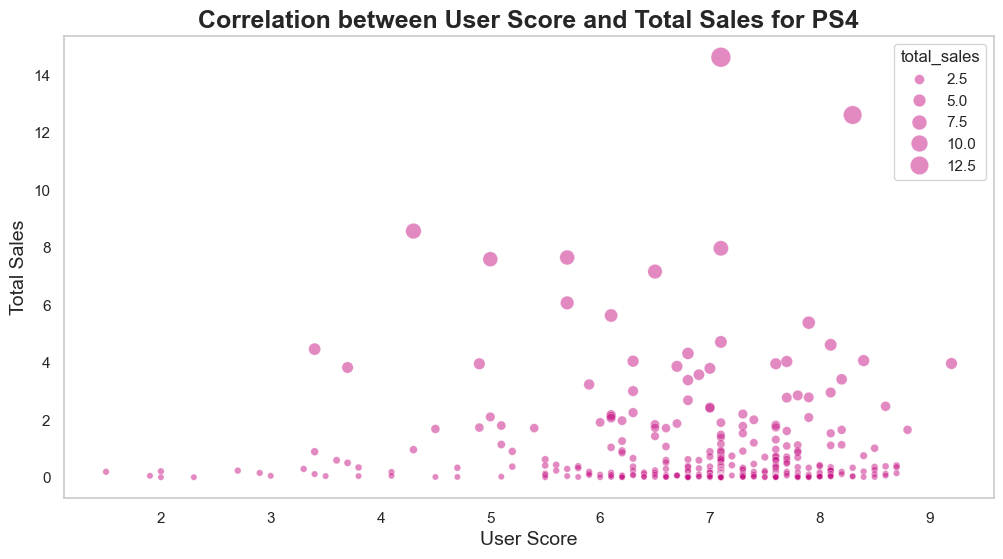

Correlation between user_score and total_sales: -0.05


In [275]:
# Filter the data for the PS4 platform
ps4_games = recent_data[recent_data['platform'] == 'PS4']  

# Calculate correlation between user_score and total_sales
correlation = ps4_games[['user_score', 'total_sales']].corr().iloc[0, 1]

# Create the scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=ps4_games, x='user_score', y='total_sales', size='total_sales', sizes=(20, 200), alpha=0.5, color='mediumvioletred')

# Titles and labels
plt.title('Correlation between User Score and Total Sales for PS4', fontsize=18, fontweight='bold')
plt.xlabel('User Score', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.grid()

# Show plot
plt.show()

print(f'Correlation between user_score and total_sales: {correlation:.2f}')


**Results**:
The correlation coefficient of -0.05 between User Score and Total Sales indicates a very weak negative relationship.There’s essentially no meaningful correlation between User Score and Total Sales for PS4 games.

**Correlation between Critic Score and Total Sales for PS4**

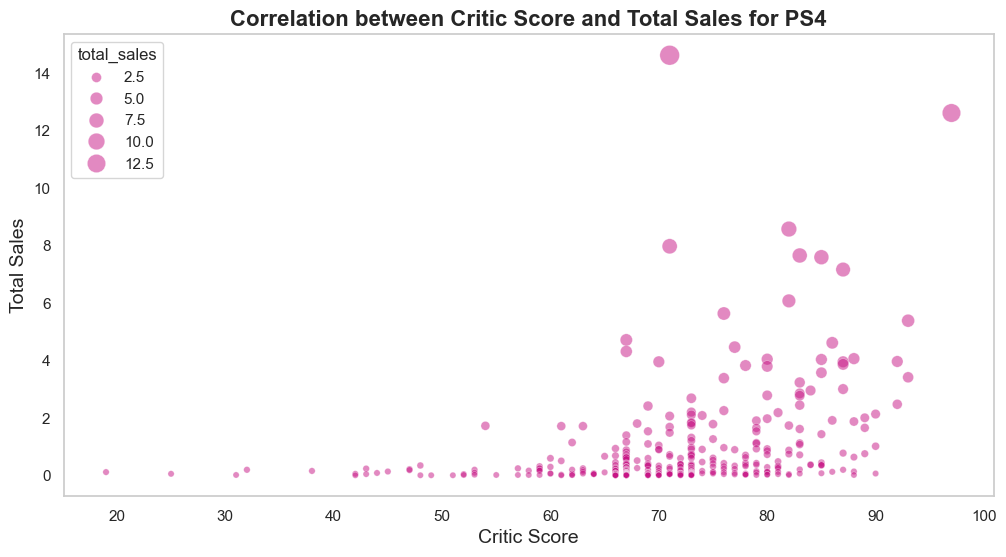

Correlation between critic_score and total_sales: 0.35


In [276]:
# Filter the data for the PS4 platform
ps4_games = recent_data[recent_data['platform'] == 'PS4'] 

# Calculate correlation between critic_score and total_sales.
correlation = ps4_games[['critic_score', 'total_sales']].corr().iloc[0, 1]

# Create the scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=ps4_games, x='critic_score', y='total_sales', size='total_sales', sizes=(20, 200), alpha=0.5, color='mediumvioletred')

# Titles and labels
plt.title('Correlation between Critic Score and Total Sales for PS4', fontsize=16, fontweight='bold')
plt.xlabel('Critic Score', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.grid()

# Show plot
plt.show()
print(f'Correlation between critic_score and total_sales: {correlation:.2f}')

**Results**: The correlation coefficient of -0.35 suggests a weak negative correlation. This indicates a slightly stronger negative relationship between Critic Score and Total Sales compared to the user score, but higher critic ratings do not strongly correlate with higher sales.

##### 6.3.3.2  XOne 

**Correlation between 'user_score' and 'total_sales'**

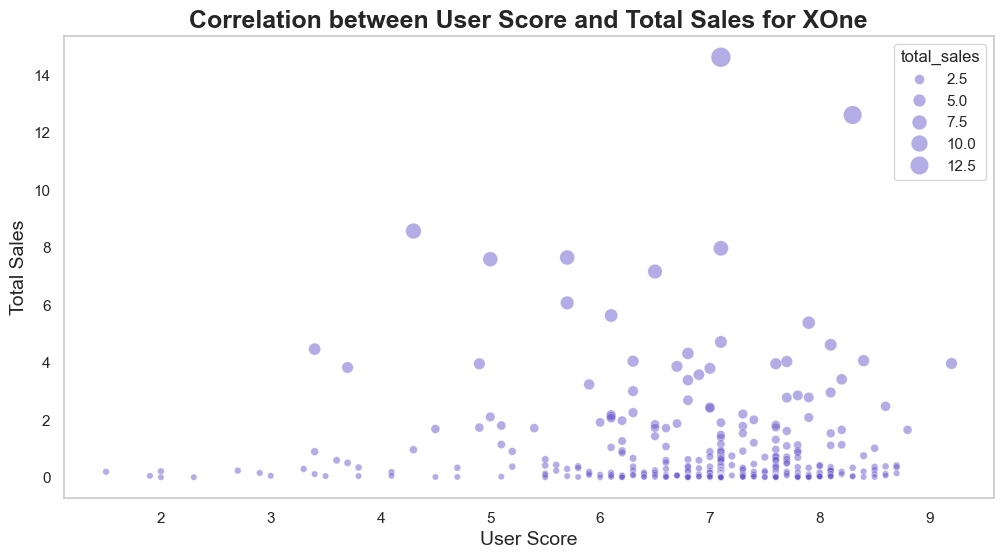

Correlation between user_score and total_sales: -0.09


In [277]:
# Filter the data for the XOne platform
xone_games = recent_data[recent_data['platform'] == 'XOne']  

# Calculate correlation between user_score and total_sales
correlation = xone_games[['user_score', 'total_sales']].corr().iloc[0, 1]

# Create the scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=ps4_games, x='user_score', y='total_sales', size='total_sales', sizes=(20, 200), alpha=0.5, color='slateblue')

# Titles and labels
plt.title('Correlation between User Score and Total Sales for XOne', fontsize=18, fontweight='bold')
plt.xlabel('User Score', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.grid()

# Show plot
plt.show()
print(f'Correlation between user_score and total_sales: {correlation:.2f}')


**Results**:
 The correlation coefficient of -0.09 suggests a weak negative correlation, reinforces that User Score has minimal impact on Total Sales for Xbox One games.

**Correlation between 'critic_score' and 'total_sales'**

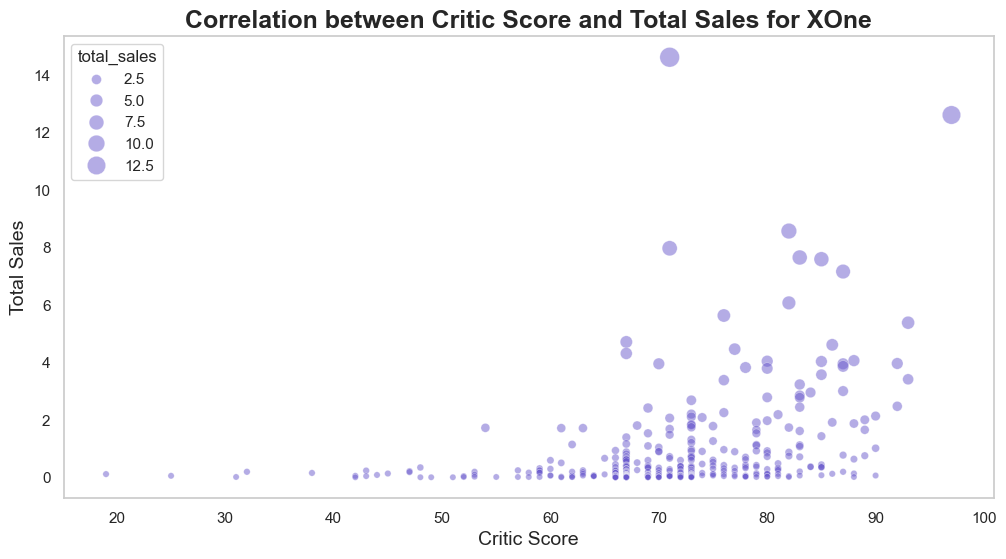

Correlation between critic_score and total_sales: 0.38


In [278]:
# Filter the data for the XOne platform
xone_games = recent_data[recent_data['platform'] == 'XOne']  

# Calculate correlation between critic_score and total_sales
correlation = xone_games[['critic_score', 'total_sales']].corr().iloc[0, 1]

# Create the scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=ps4_games, x='critic_score', y='total_sales', size='total_sales', sizes=(20, 200), alpha=0.5, color='slateblue')

# Titles and labels
plt.title('Correlation between Critic Score and Total Sales for XOne', fontsize=18, fontweight='bold')
plt.xlabel('Critic Score', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.grid()

# Show plot
plt.show()
print(f'Correlation between critic_score and total_sales: {correlation:.2f}')


**Results**:
 The correlation coefficient of 0.38 suggests a weak negative correlation, this indicates that Critic Score has a slight influence on sales.

##### 6.3.3.3  3DS

**Correlation between 'user_score' and 'total_sales'**

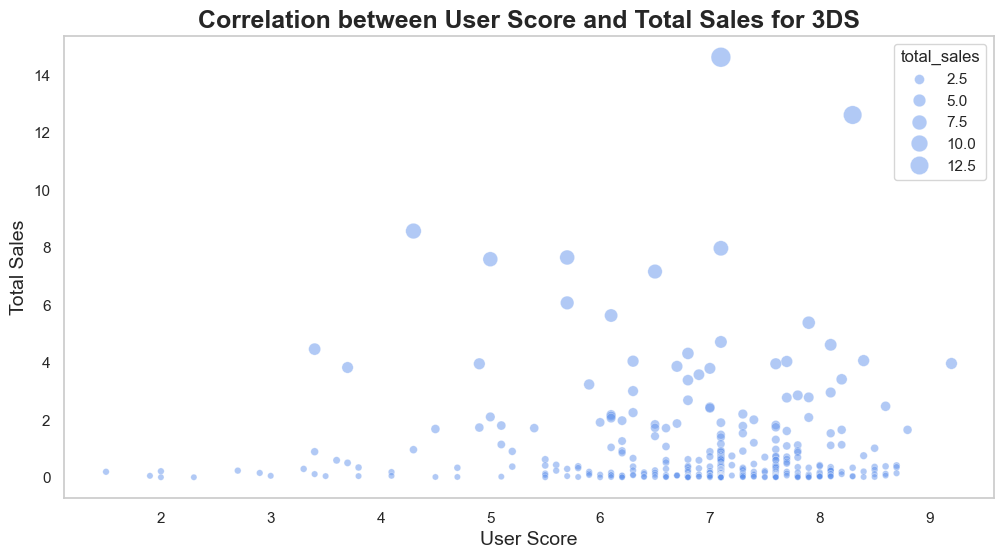

Correlation between user_score and total_sales: 0.16


In [279]:
# Filter the data for the 3DS platform
tds_games = recent_data[recent_data['platform'] == '3DS']  

# Calculate correlation between user_score and total_sales
correlation = tds_games[['user_score', 'total_sales']].corr().iloc[0, 1]

# Create the scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=ps4_games, x='user_score', y='total_sales', size='total_sales', sizes=(20, 200), alpha=0.5, color='cornflowerblue')

# Titles and labels
plt.title('Correlation between User Score and Total Sales for 3DS', fontsize=18, fontweight='bold')
plt.xlabel('User Score', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.grid()

# Show plot
plt.show()
print(f'Correlation between user_score and total_sales: {correlation:.2f}')

**Results**: The correlation coefficient of 0.16 User Score barely affects Total Sales for Xbox One games.

**Correlation between 'critic_score' and 'total_sales'**

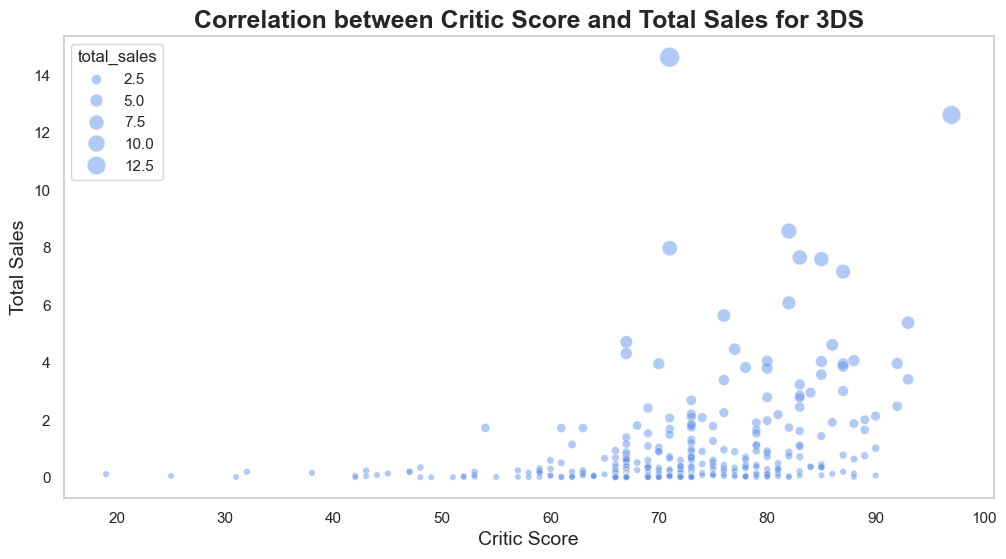

Correlation between user_score and total_sales: 0.26


In [280]:
# Filter the data for the 3DS platform
tds_games = recent_data[recent_data['platform'] == '3DS']  

# Calculate correlation between critic_score and total_sales
correlation = tds_games[['critic_score', 'total_sales']].corr().iloc[0, 1]

# Create the scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=ps4_games, x='critic_score', y='total_sales', size='total_sales', sizes=(20, 200), alpha=0.5, color='cornflowerblue')

# Titles and labels
plt.title('Correlation between Critic Score and Total Sales for 3DS', fontsize=18, fontweight='bold')
plt.xlabel('Critic Score', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.grid()

# Show plot
plt.show()
print(f'Correlation between user_score and total_sales: {correlation:.2f}')

**Results**: The correlation coefficient of 0.26 Critic Score barely affects Total Sales for Xbox One games.

####  6.3.4 	Sales distribution per genre

Which are the most profitable genres? 

Can the genres with high and low sales be generalized?

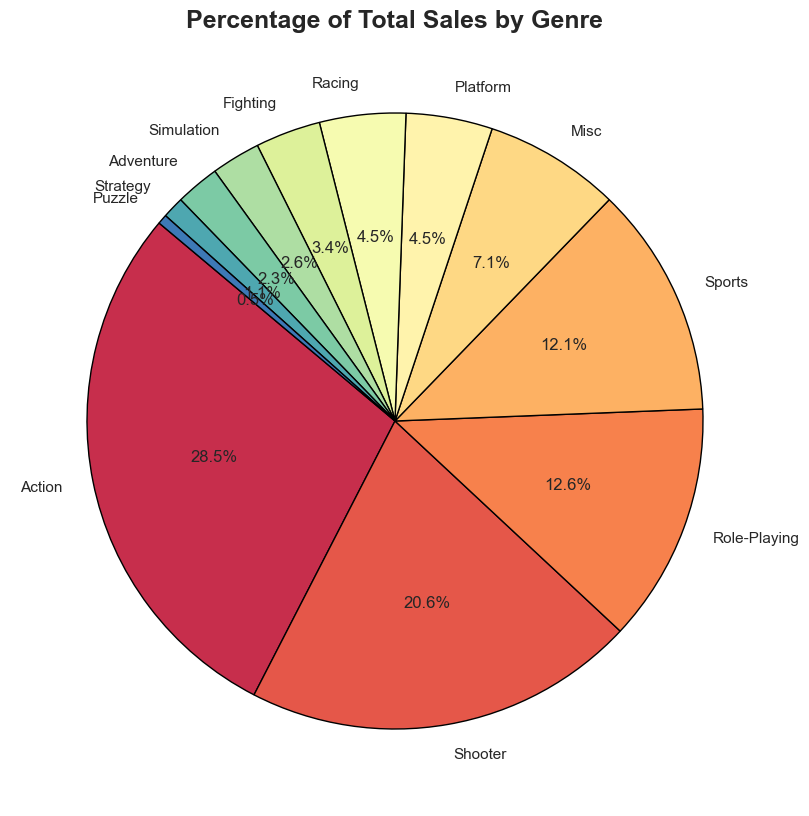

In [281]:
# Group by 'total_sales' and 'genre'
genre_sales = recent_data.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

# Create the pie chart
plt.figure(figsize=(10, 10))
plt.pie(genre_sales.values, labels=genre_sales.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Spectral", len(genre_sales)), wedgeprops={'edgecolor': 'black'})

# Title
plt.title('Percentage of Total Sales by Genre', fontsize=18, fontweight='bold')

# Show the plot
plt.show()

**Observations**: Globally by total sales, the firt 5 generes are `Action`, `Shooter`, `Role-Playing`, `Sports` and `Misc`. They represent 80.9% of `Total_Sales`. 

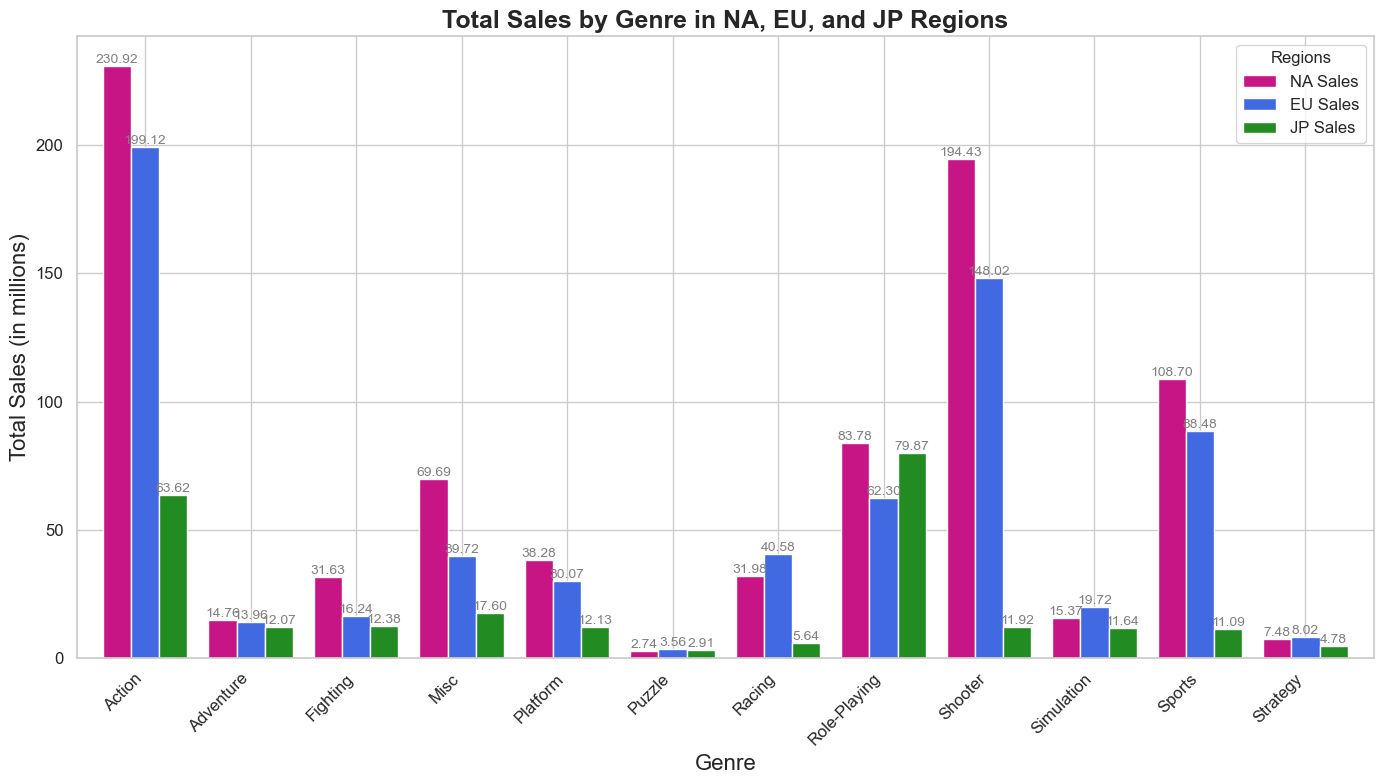

In [282]:
# Group regional sales by 'genre'
region_genre_sales = recent_data.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']].sum()

# Reset the index to convert 'genre' into a column
region_genre_sales = region_genre_sales.reset_index()

# Custom colors for the bars
colors = ['mediumvioletred', 'royalblue', 'forestgreen']

# Create the grouped bar chart
ax = region_genre_sales.plot(
    kind='bar', x='genre', stacked=False, color=colors, edgecolor='white', width=0.8, figsize=(14, 8)
)

# Titles and labels
plt.title('Total Sales by Genre in NA, EU, and JP Regions', fontsize=18, fontweight='bold')
plt.xlabel('Genre', fontsize=16)
plt.ylabel('Total Sales (in millions)', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.legend(['NA Sales', 'EU Sales', 'JP Sales'], title="Regions", fontsize=12)

# Display the total on top of each bar
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2, height,
            f'{height:.2f}', ha='center', va='bottom', fontsize=10, color='gray'
        )

# Show plot
plt.tight_layout()
plt.show()

**Results**

**Most and Least Profitable Genres**:

1. **North America:**
   - **Most Profitable Genres:** Shooter (194.43 million), Action (230.92 million), and Sports (108.7 million).
   - **Low Sales Genres:** Strategy (7.48 million) and Puzzle (2.74 million).

2. **Europe:**
   - **Most Profitable Genres:** Shooter (148.02 million), Action (199.12 million), and Sports (88.48 million).
   - **Low Sales Genres:** Strategy (8.02 million) and Puzzle (5.62 million).

3. **Japan:**
   - **Most Profitable Genres:** Role-Playing (62.3 million), Action (63.62 million), and Fighting (38.28 million).
   - **Low Sales Genres:** Shooter (17.6 million) and Puzzle (2.13 million).

The most profitable genres are **Action** and **Shooter** in NA and EU, while in JP, the **Role-Playing** genre leads, followed by **Action**. 

**Puzzle** and **Strategy** genres have the lowest sales across all regions, indicating a generally lower interest in these genres.


## 7. User profile per region

### 7.1 Top Five  Platforms

Describe the variations in their market shares* from one region to another.

*Market share is calculated by dividing the total sales of a particular product or industry by a company's sales during the same time period.

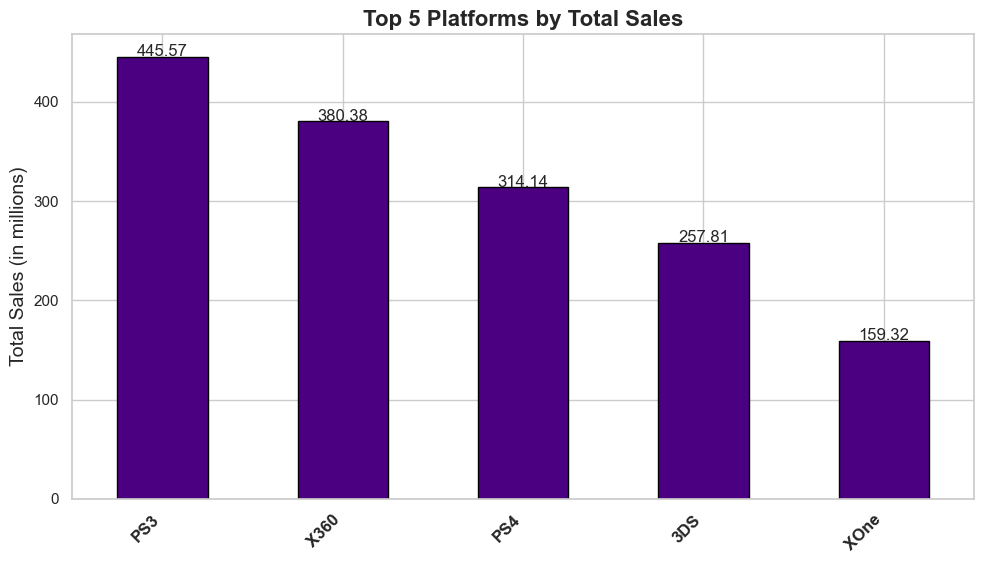

In [283]:
# Calculate the Top 5 'platforms' by 'total_sales'
topfiveplt = recent_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(5)

# Plot the bar chart
plt.figure(figsize=(10, 6))
topfiveplt.plot(kind='bar', color='indigo', edgecolor='black')

# Add titles and labels
plt.title('Top 5 Platforms by Total Sales', fontsize=16, fontweight='bold')
plt.xlabel('Platform', color='white')
plt.ylabel('Total Sales (in millions)', fontsize=14)

# Add data labels on top of each bar
for index, value in enumerate(topfiveplt):
    plt.text(index, value + 0.5, f'{value:.2f}', ha='center', fontsize=12)

# Show the plot
plt.xticks(rotation=45, ha='right', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

**Results**
Across al regions the top 5 five `platforms` in `total_sales`  by descending order are **PS3**, **x360**,  **PS4**,  **3DS**, and  **XOne**.

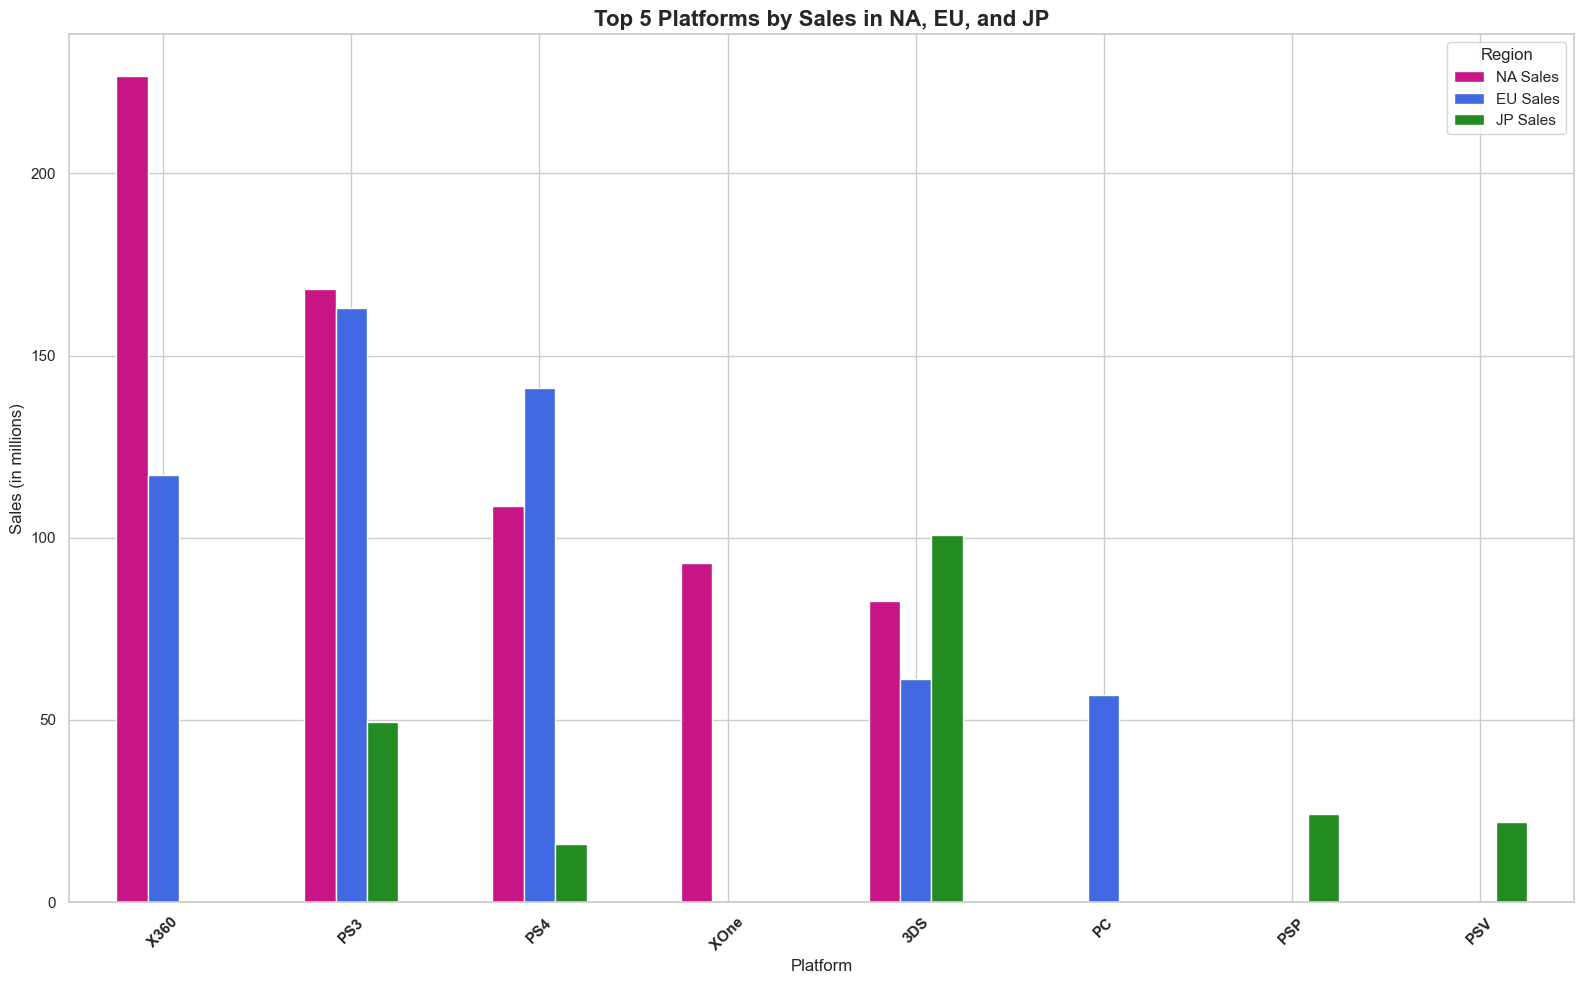

In [284]:
# Top 5 platforms by region

# Group by platform and sum sales by region
platform_sales = recent_data.groupby('platform').agg({
    'na_sales': 'sum',
    'eu_sales': 'sum',
    'jp_sales': 'sum'
}).reset_index()

# Get the top 5 platforms with the most sales in each region
top_na_sales = platform_sales.nlargest(5, 'na_sales')
top_eu_sales = platform_sales.nlargest(5, 'eu_sales')
top_jp_sales = platform_sales.nlargest(5, 'jp_sales')

# Combine the top platforms into a single DataFrame
top_platforms = pd.concat([top_na_sales.set_index('platform')['na_sales'], 
                            top_eu_sales.set_index('platform')['eu_sales'], 
                            top_jp_sales.set_index('platform')['jp_sales']], 
                           axis=1).fillna(0)

top_platforms.columns = ['NA Sales', 'EU Sales', 'JP Sales']

# Configure the plot
top_platforms.plot(kind='bar', figsize=(16, 10), color=['mediumvioletred', 'royalblue', 'forestgreen'])

# Set plot title and labels
plt.title('Top 5 Platforms by Sales in NA, EU, and JP', fontsize=16, fontweight='bold')
plt.ylabel('Sales (in millions)')
plt.xlabel('Platform')
plt.xticks(rotation=45, fontweight='bold')
plt.legend(title='Region')
plt.tight_layout()
plt.show()

**Results**

**Most and Least Profitable Platforms**:

1. **North America:**
   - **Most Profitable Platforms** X360, PS3, PS4, XOne and 3DS. 

2. **Europe:**
   - **Most Profitable Platforms:** PS3, PS4, X360, 3DS, and PC.
   

3. **Japan:**
   - **Most Profitable Platforms:** 3DS, PS3, PSP, PDV, and PS4.
   
   
The most profitable platforms they have in common are **PS3** and **PS4** and **3DS**.

**PC** and **PSV** can be an interest platform for further development on a global scale.

In [285]:
# Market share by region and common platforms in top 5

# Calculate the total income from all sales
total_income = recent_data['total_sales'].sum()

# Define the platforms of interest
platforms = ['PS3', 'X360', 'PS4']

# Initialize a dictionary to store total shares
total_shares = {}

# Print the market share variations for each platform
print('Market Share Variation by Region for Each Platform:')
for platform in platforms:
    print(f"\nPlatform: {platform}")
    
    # Filter the data for the current platform
    recent_data_platform = recent_data[recent_data['platform'] == platform]
    
    # Initialize the total share for the platform
    total_share = 0
    
    for region in ['na_sales', 'eu_sales', 'jp_sales']:
        share = round(recent_data_platform[region].sum() / total_income * 100, 3)
        print(f"{region}: {share}%")
        
        # Add the share to the total share of the platform
        total_share += share
    
    # Store the total share in the dictionary
    total_shares[platform] = total_share

# Sort the platforms by total share and select the top three
top_platforms = sorted(total_shares.items(), key=lambda x: x[1], reverse=True)

# Print the top platforms
print("\nThe top platforms by market share are:")
for platform, share in top_platforms:
    print(f"{platform}: {share}%")

Market Share Variation by Region for Each Platform:

Platform: PS3
na_sales: 8.611%
eu_sales: 8.347%
jp_sales: 2.527%

Platform: X360
na_sales: 11.606%
eu_sales: 5.992%
jp_sales: 0.171%

Platform: PS4
na_sales: 5.565%
eu_sales: 7.22%
jp_sales: 0.817%

The top platforms by market share are:
PS3: 19.485%
X360: 17.769%
PS4: 13.602%


**Regional preferences for the PS3, X360, and PS4 platforms**:


1.   - **North America**: The X360 has the highest market share at 11.606%, followed by PS3 at 8.611%,  and in 3rd place is PS4 at 5.565%.
2.   - **Europe**: The PS4 has the highest market share at 7.22%, followed by PS3 at 8.347%,  and in 3rd place is X360 at 5.992%.

3.   - **Japan**: The PS3 has the highest market share at 2.527%, followed by PS4 at 0.817%,  and in 3rd place is PS4 at 0.171%. 

It should be noted that Japan differs slightly in consumption of the main platforms, which is why it has such a low percentage.

**The top platforms by market share**:

The **PS3** dominates the global market share (19.485%) due to the high number of sales in North America and Europe.
Next is the **X360** with 17.769% thanks to high sales in NA. 
At the end we have the **PS4**, the newest in the market, with 13.602% total market share, but it lags slightly behind due to its lower sales in Japan and North America compared to the other platforms.


### 7.2  Top Five genres. 

Explaining their differences.

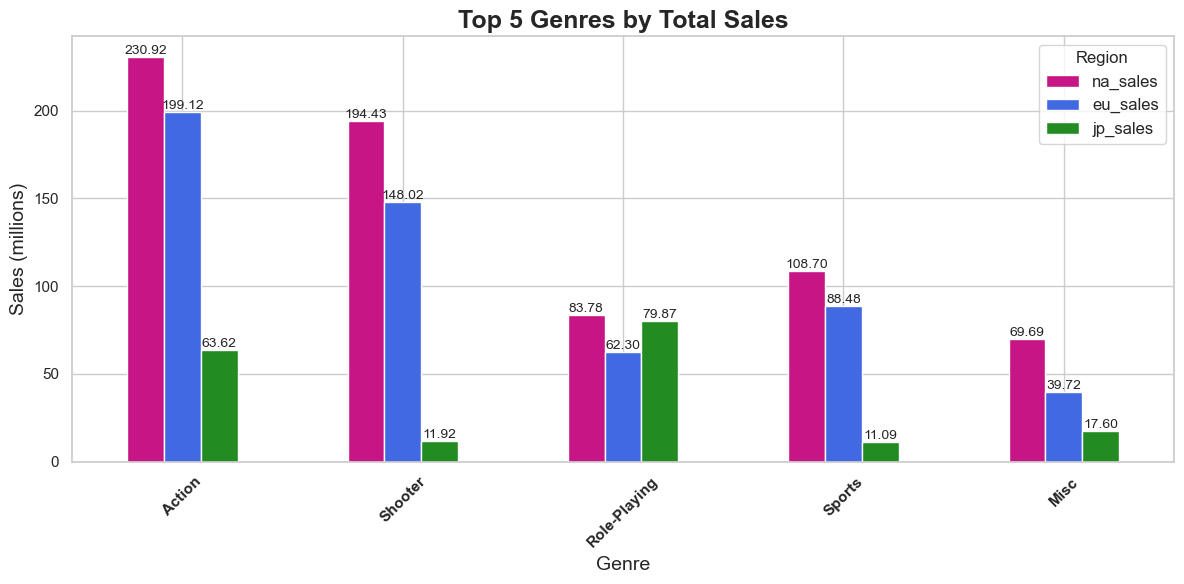

In [286]:
# Sum regional sales by 'genre'
sales_by_genre = recent_data.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']].sum()

# Get top 5 genres with the most total sales of all regions
sales_by_genre['total_sales'] = sales_by_genre.sum(axis=1)
top_5_genres = sales_by_genre.nlargest(5, 'total_sales')

# Custom colors for the bars
colors = ['mediumvioletred', 'royalblue', 'forestgreen']

# Create the grouped bar chart
ax = top_5_genres[['na_sales', 'eu_sales', 'jp_sales']].plot(kind='bar', color=colors, figsize=(12, 6), edgecolor="white")

# Titles and labels
plt.title('Top 5 Genres by Total Sales', fontsize=18, fontweight='bold')
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Sales (millions)', fontsize=14)
plt.xticks(rotation=45, fontweight='bold')
plt.legend(title='Region', fontsize=12)

# Adding total sales above the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10)

# Show plot
plt.tight_layout()
plt.show()

**Results**:

**Action**: The genre with the most sales (493.66 million). It dominates in NA, and in the US, in JP it is the third in sales.

**Shooter**: It has 354.37 million in total sales. It is the second best selling genre in NA and the US, in JP it is the 4th place.

**Role-Playing**: It has 225.95 million in sales, it is the best selling genre in JP, the fourth in NA and the US.

**Sports**: With a total of 208.27 million in sales, it is the third in sales in NA and the US, the last in JP.

**Misc**: With a total of 127.01 million it is the 5th place in sales in NA and the US. It is the fourth best selling in JP.



### 7.3 Discuss whether ESRB ratings affect sales in individual regions

#### 7.3.1 ESRB Rating: North America, Europe and Japan 

In [287]:
# Filter rating by regional sales

rating_global = recent_data.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum().sort_values(by='na_sales', ascending=False)
rating_global 

,na_sales,eu_sales,jp_sales
rating,,,
M,308.45,250.26,26.14
E,170.59,141.73,36.68
RP,123.69,116.64,138.21
E10+,117.72,78.00,11.23
T,109.31,83.16,33.39


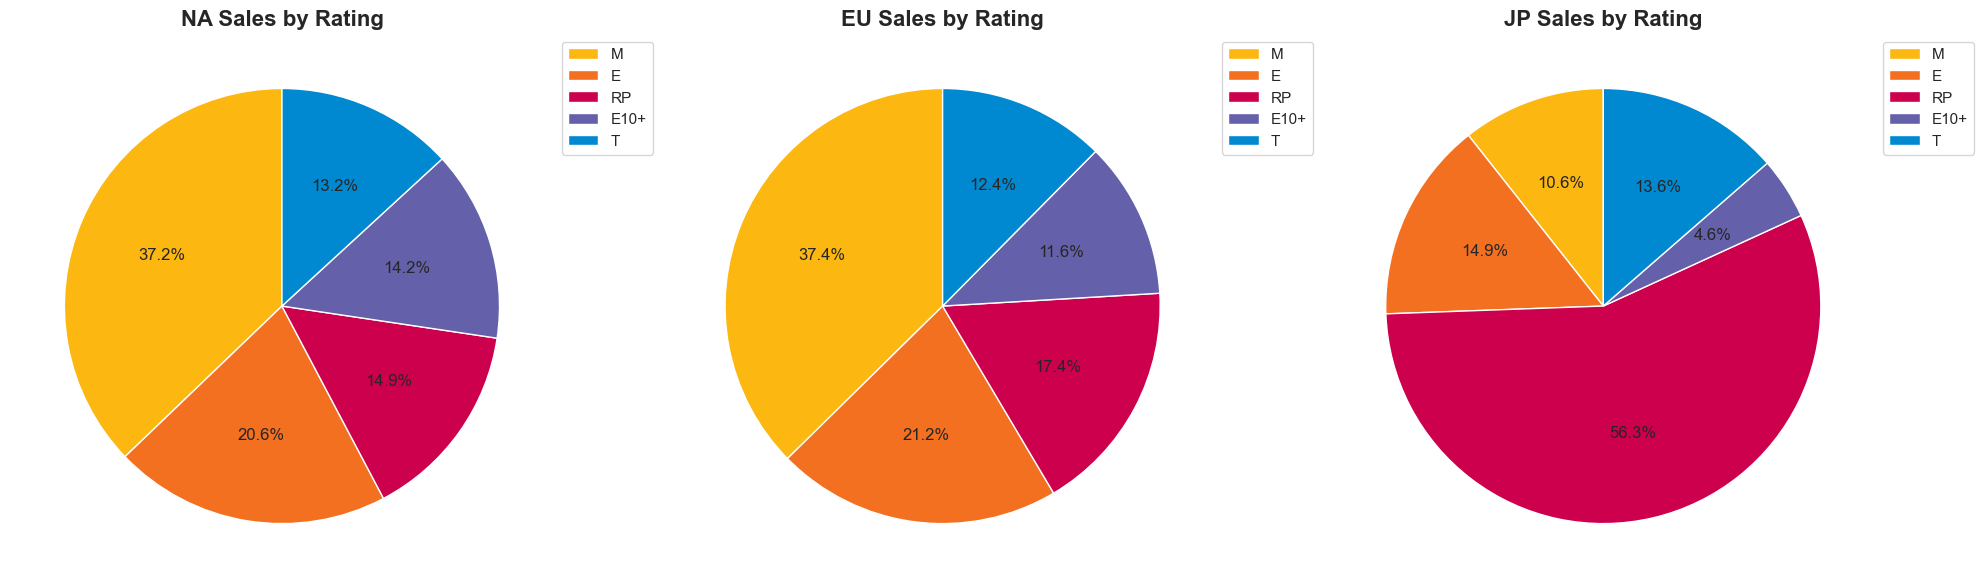

In [288]:
# Calculate total sales for each region
total_sales = rating_global.sum()

# Convert to percentages
rating_global_percentage = rating_global.div(total_sales) * 100

# Sort values by NA sales percentage
rating_global_percentage = rating_global_percentage.sort_values(by='na_sales', ascending=False)

# Custom colors
colors = ['#fcb711', '#f37021', '#cc004c', '#6460aa', '#0089d0', '#0db14b', '#3f4bac']


# Create three pie charts for NA, EU, and JP sales
fig, axes = plt.subplots(1, 3, figsize=(20, 7))

# Pie chart for NA Sales
axes[0].pie(rating_global_percentage['na_sales'], 
            autopct='%1.1f%%', 
            colors=colors[:len(rating_global_percentage)], 
            startangle=90)
axes[0].set_title('NA Sales by Rating', fontsize=16, weight='bold')
axes[0].legend(rating_global_percentage.index, loc='upper left', bbox_to_anchor=(1, 1))

# Pie chart for EU Sales
axes[1].pie(rating_global_percentage['eu_sales'], 
            autopct='%1.1f%%', 
            colors=colors[:len(rating_global_percentage)], 
            startangle=90)
axes[1].set_title('EU Sales by Rating', fontsize=16, weight='bold')
axes[1].legend(rating_global_percentage.index, loc='upper left', bbox_to_anchor=(1, 1))

# Pie chart for JP Sales
axes[2].pie(rating_global_percentage['jp_sales'], 
            autopct='%1.1f%%', 
            colors=colors[:len(rating_global_percentage)], 
            startangle=90)
axes[2].set_title('JP Sales by Rating', fontsize=16, weight='bold')
axes[2].legend(rating_global_percentage.index, loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


#### 7.3.2  Perform ANOVA for each region

In [289]:
# This code performs an ANOVA test to check if there are significant differences in video game sales between Na, EU, and JP
# If the p-value is below the significance level alpha = 0.05, it indicates a significant difference in sales.

# Group sales by ESRB rating in each region
na_sales_groups = [recent_data['na_sales'].values for name, group in games.groupby('rating')]
eu_sales_groups = [recent_data['eu_sales'].values for name, group in games.groupby('rating')]
jp_sales_groups = [recent_data['jp_sales'].values for name, group in games.groupby('rating')]

# ANOVA tests
alpha = 0.05  # Significance level

na_anova = st.f_oneway(*na_sales_groups)
eu_anova = st.f_oneway(*eu_sales_groups)
jp_anova = st.f_oneway(*jp_sales_groups)

# Display results and check significance
print(f'ANOVA results for NA Sales: F-statistic = {na_anova.statistic}, p-value = {na_anova.pvalue}')
if na_anova.pvalue < alpha:
    print("NA Sales: Significant differences in sales between ESRB ratings (p < 0.05).")
else:
    print("NA Sales: No significant differences in sales between ESRB ratings (p >= 0.05).")

print(f'ANOVA results for EU Sales: F-statistic = {eu_anova.statistic}, p-value = {eu_anova.pvalue}')
if eu_anova.pvalue < alpha:
    print("EU Sales: Significant differences in sales between ESRB ratings (p < 0.05).")
else:
    print("EU Sales: No significant differences in sales between ESRB ratings (p >= 0.05).")

print(f'ANOVA results for JP Sales: F-statistic = {jp_anova.statistic}, p-value = {jp_anova.pvalue}')
if jp_anova.pvalue < alpha:
    print("JP Sales: Significant differences in sales between ESRB ratings (p < 0.05).")
else:
    print("JP Sales: No significant differences in sales between ESRB ratings (p >= 0.05).")

ANOVA results for NA Sales: F-statistic = 1.1109885860736683e-30, p-value = 1.0
NA Sales: No significant differences in sales between ESRB ratings (p >= 0.05).
ANOVA results for EU Sales: F-statistic = 3.6179068994083564e-30, p-value = 1.0
EU Sales: No significant differences in sales between ESRB ratings (p >= 0.05).
ANOVA results for JP Sales: F-statistic = 4.709623438495229e-30, p-value = 1.0
JP Sales: No significant differences in sales between ESRB ratings (p >= 0.05).


## 8. Hypothesis testing


###  8.1 The average user ratings for the Xbox One and PC platforms are the same.

- **Null Hypothesis (H0)**: The average 'user_score' between Xbox One and PC platforms are the same.

- **Alternative Hypothesis (H1)**: The average 'user_score' between Xbox One and PC platforms are different.

In [290]:
# Filter data for Xbox One and PC platforms
xone_uscores = recent_data[recent_data['platform'] == 'XOne']['user_score'].dropna()
pc_uscores =recent_data[recent_data['platform'] == 'PC']['user_score'].dropna()

# Perform an independent t-test
t_stat, p_value = ttest_ind(xone_uscores, pc_uscores, equal_var=False) 
# Set significance level
alpha = 0.05

# Print results
print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")

if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis")


T-statistic: 0.7877, P-value: 0.4312
Fail to reject the null hypothesis


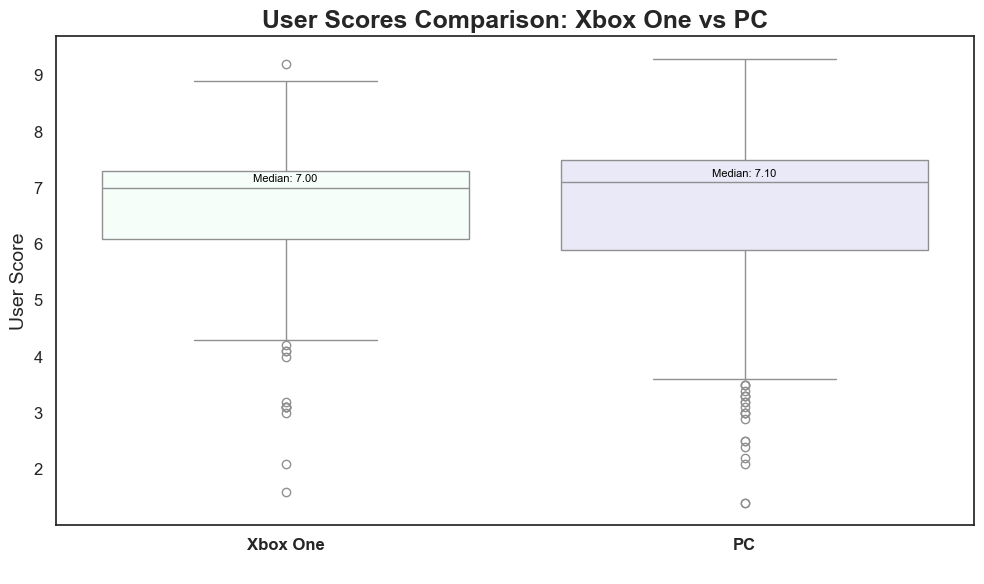

In [291]:
# Combine the scores into a DataFrame for plotting
scores_data = pd.DataFrame({
    'Platform': ['Xbox One'] * len(xone_uscores) + ['PC'] * len(pc_uscores),
    'User Score': list(xone_uscores) + list(pc_uscores)
})

# Set the style to white (to hide grid lines)
sns.set(style="white")

# Set up the figure
plt.figure(figsize=(10, 6))

# Create a box plot with two shades of purple
sns.boxplot(x='Platform', y='User Score', hue='Platform', data=scores_data, palette=['mintcream', 'lavender'])

# Hide the background
plt.gca().patch.set_visible(False)

# Calculate median scores
median_xbox = xone_uscores.median()
median_pc = pc_uscores.median()

# Add median annotations to the plot
plt.text(0, median_xbox + 0.1, f'Median: {median_xbox:.2f}', horizontalalignment='center', fontsize=8, color='black')
plt.text(1, median_pc + 0.1, f'Median: {median_pc:.2f}', horizontalalignment='center', fontsize=8, color='black')

# Titles and labels
plt.title('User Scores Comparison: Xbox One vs PC', fontsize=18, fontweight='bold')
plt.xlabel('Platform', color='white')
plt.ylabel('User Score', fontsize=14)

plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12)

# Show plot
plt.tight_layout()
plt.show()

 **Results**:
 
 The average user ratings for Xbox One and PC platforms are not significantly different. We can see that they share **almost the same median** for `user_score`.

### 8.2 The average user ratings for the Action and Sports genres are different
- **Null Hypothesis (H0)**: The average 'user_score' between Action and Sport genres are different. 

- **Null Hypothesis (H1)**: The average 'user_score' between Action and Sport genres are are the same.

In [292]:
# Filter data for Action and Sports genres
action_scores = recent_data[recent_data['genre'] == 'Action']['user_score'].dropna()
sports_scores = recent_data[recent_data['genre'] == 'Sports']['user_score'].dropna()

# Perform an independent t-test
t_stat, p_value = ttest_ind(action_scores, sports_scores, equal_var=False)  # Welch’s t-test

# Set significance level
alpha = 0.05

# Print results
print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")

if p_value < alpha:
    print("Reject the null hypothesis: The average user ratings for Action and Sports genres are significantly different.")
else:
    print("Fail to reject the null hypothesis: The average user ratings for Action and Sports genres are not significantly different.")


T-statistic: 9.6923, P-value: 0.0000
Reject the null hypothesis: The average user ratings for Action and Sports genres are significantly different.


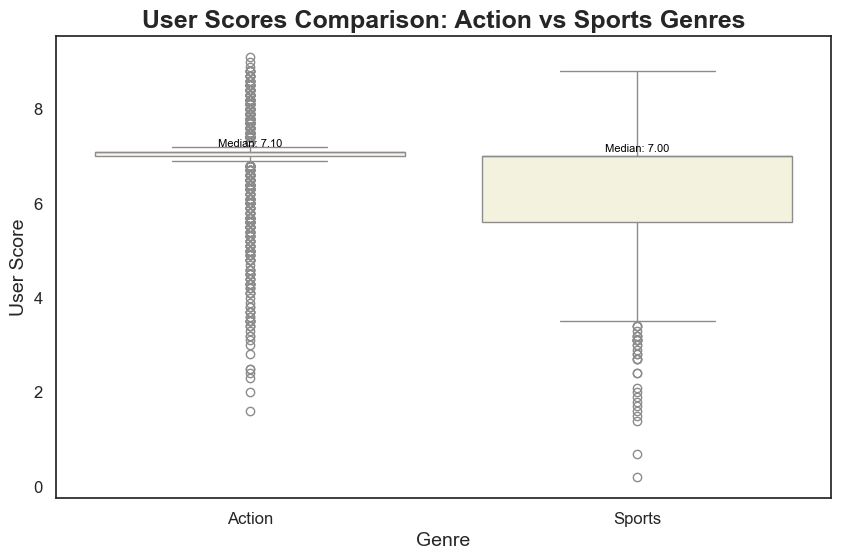

In [293]:
# Filter data for Action and Sports genres
action_scores = recent_data[recent_data['genre'] == 'Action']['user_score'].dropna()
sports_scores = recent_data[recent_data['genre'] == 'Sports']['user_score'].dropna()

# Combine the scores into a DataFrame for plotting
scores_data = pd.DataFrame({
    'Genre': ['Action'] * len(action_scores) + ['Sports'] * len(sports_scores),
    'User Score': list(action_scores) + list(sports_scores)
})

# Set the style to white (to hide grid lines)
sns.set(style="white")

# Set up the figure
plt.figure(figsize=(10, 6))

# Create a box plot with two shades of purple
sns.boxplot(x='Genre', y='User Score', hue='Genre', data=scores_data, palette=['oldlace', 'beige'])

# Hide the background
plt.gca().patch.set_visible(False)

# Calculate median scores
median_action = action_scores.median()
median_sports = sports_scores.median()

# Add median annotations to the plot
plt.text(0, median_action + 0.1, f'Median: {median_action:.2f}', horizontalalignment='center', fontsize=8, color='black')
plt.text(1, median_sports + 0.1, f'Median: {median_sports:.2f}', horizontalalignment='center', fontsize=8, color='black')

# Titles and labels
plt.title('User Scores Comparison: Action vs Sports Genres', fontsize=18, fontweight='bold')
plt.xlabel('Genre', fontsize=14)
plt.ylabel('User Score', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show plot
plt.show()

 **Results**:
 The average user ratings for `Action` and `Sports` genres are significantly different. We can see that they share **almost the same median** for `user_score`.

## 9. Conclusion

- It should be noted that the `NA` and `EU` regions tend to give similar results, compared to the results of the `JP` region. 
- It should be noted that there are two platforms that, although not high in sales, are a low-revenue market, but constant, those are `PC` and `PSV`.
- The ones with more growth oportunities are `PS4` and `XOne`. 

- `Role-Playing`games are more popular in `JP`, and `Action` and `Shooting`in `EU` and `NA`. `Sports` is also popular among the 3 regions.
- Due to the large number of missing values in the `'rating'` column, it is possible that this is the main factor why sales are not affected by this classification.
- There's no correlation between user and critic ratings with total sales.

**Main Conclusion**:
- One thing is for sure, all next `PS` platforms have the most chance to succeed in revenue, due the popularity of the previous ones, and along with `Xbox` newest models. The best genres in revenue are `Action` and `Shooting` games could be a great oportunity to focus for next year campaing.  
